In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import scipy
import pylab
import math
import random
import pyod

from sklearn.metrics.pairwise import haversine_distances
from tqdm import tqdm
from fuzzywuzzy import fuzz
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import difflib 

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA, _pca
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
#from kneed import KneeLocator

#from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.ensemble import IsolationForest       #импортирование алгоритма “изолирующий лес”
from sklearn.svm import OneClassSVM                #импортирование алгоритма “OneClassSVM”
from pyod.models.copod import COPOD                #импортирование алгоритма “COPOD”
from pyod.models.pca import PCA                    #импортирование алгоритма “PCA”
from pyod.models.auto_encoder import AutoEncoder   #импортирование алгоритма “AutoEncoder”
from sklearn.neighbors import LocalOutlierFactor   #импортирование алгоритма “LocalOutlierFactor”


%matplotlib inline
sns.set()

/opt/conda/python37/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
#pip install pyod

In [16]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 50

In [4]:
df = pd.read_csv('White_ЦИАН_Мск_МО.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head(5)

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit,bti_year_built,is_elit,address_full,is_renovation,address_renovation,Объем_рынка,Районы_Kmeans_str
0,238345845,https://images.cdn-cian.ru/images/78/391/501/k...,https://www.cian.ru/sale/flat/238345845,13140000,16.391172,65.7,от_65_до_85,199999.0,12.206068,2-комн.,3-к,последний,8,8,Монолитный,2024-10-04 00:00:00,no,55.81953,37.24588,55.81953 37.24588,Московская область,Красногорск,МО_З,Красногорск,улица Пришвина,15,24.614772,от_19_до_30_км,За_МКАД,За_МКАД,Опалиха,walk,до_6_минут,6.0,D2_Опалиха,0.416612,Вашему вниманию предлагается 2-х комнатная ква...,2024-10-16 00:00:00,1,208979.0,4,нет,нет,2020,нет,"Московская область, Красногорск, улица Пришвин...",нет,нет,10900,4
1,239198805,https://images.cdn-cian.ru/images/3/648/639/93...,https://www.cian.ru/sale/flat/239198805,7550000,15.837058,50.0,от_42_до_65,151000.0,11.925035,2-комн.,2-к,первый,1,2,Кирпичный,2024-09-28 00:00:00,cosmetic,55.63384,37.84267,55.63384 37.84267,Московская область,Дзержинский,МО_ЮВ,Дзержинский,улица Строителей,10,19.198938,от_19_до_30_км,За_МКАД,За_МКАД,Котельники,transport,нет_пешей_доступности,10.0,Таганско_Краснопресненская_Котельники,4.589888,"Квартира для тех, кто ценит тишину и спокойст...",2024-10-16 00:00:00,1,159635.0,2,нет,нет,1956,нет,"Московская область, Дзержинский, улица Строите...",нет,нет,25994,2
2,240154473,https://images.cdn-cian.ru/images/1/673/449/kv...,https://www.cian.ru/sale/flat/240154473,6100000,15.623799,42.2,от_42_до_65,144549.0,11.881374,1-комн.,2-к,этажи_2-5,4,17,Панельный,2024-10-03 00:00:00,euro,55.83250,37.97867,55.8325 37.97867,Московская область,Балашиха-2,МО_В,Балашиха-2,улица 40 лет Победы,29,23.995573,от_19_до_30_км,За_МКАД,За_МКАД,Щёлковская,transport,нет_пешей_доступности,16.0,D5_Балашиха_Балашиха,3.110049,Ян. Квартира в хорошем состоянии! Один взрослы...,2024-10-16 00:00:00,1,152876.0,2,нет,нет,2008,нет,"Московская область, Балашиха-2, улица 40 лет П...",нет,нет,25994,2
3,239293843,https://images.cdn-cian.ru/images/2071196285-1...,https://www.cian.ru/sale/flat/239293843,75000000,18.132999,130.0,более_105,576923.0,13.265464,3-комн.,4+,этажи_24-33,27,34,Монолитный,2024-09-25 00:00:00,design,55.76035,37.41940,55.76035 37.4194,Москва,Москва,ЗАО,ЗАО_Крылатское,улица Крылатские Холмы,37,12.673599,от_8_до_14_км,МКАД,внутри_МКАД,Крылатское,walk,от_6_до_12_минут,11.0,Арбатско_Покровская_Крылатское,0.805016,Лот 57704 Вашему вниманию предлагается 3-комна...,2024-10-16 00:00:00,0,376190.0,12,нет,нет,2006,нет,"Москва, улица Крылатские Холмы, 37",нет,нет,6517,12
4,239383173,https://images.cdn-cian.ru/images/5/153/839/kv...,https://www.cian.ru/sale/flat/239383173,264200000,19.392217,330.0,более_105,800606.0,13.593124,4+-комн.,4+,этажи_2-5,2,12,Монолитный,2024-09-30 00:00:00,design,55.83210,37.48396,55.8321 37.48396,Москва,Москва,САО,САО_Войковский,Ленинградское шоссе,37к1,12.275179,от_8_до_14_км,МКАД,внутри_МКАД,Войковская,transport,нет_пешей_доступности,3.0,Замоскворецкая_Водный_стадион,0.873577,"ЖК ""Город Яхт"" 2007 года постройки. Охраняемая...",2024-10-16 00:00:00,0,357142.0,10,нет,нет,2007,нет,"Москва, Ленинградское шоссе, 37к1",нет,нет,6517,10


In [373]:
df.columns

Index(['cian_id', 'photo', 'url', 'bargainterms_price',
       'bargainterms_price_LN', 'area_total', 'area_total_1', 'unit_price',
       'unit_price_LN', 'rooms_count', 'rooms_count_1', 'floor_1', 'floor',
       'floors_count', 'wall_type', 'last_edited', 'repair_type', 'lat', 'lng',
       'lat_lng', 'geo_region', 'geo_settlement_1', 'geo_city_okrug_1',
       'geo_city_district_1', 'geo_street', 'geo_house_num',
       'distance_to_centre', 'distance_to_centre_1', 'rings_MSK', 'rings_MKAD',
       'subway_name', 'subway_travel_type', 'subway_time_1', 'subway_time',
       'nearest_metro', 'distance_to_nearest_metro', 'description', 'ptn_dadd',
       'Регион_enc', 'med_price', 'Районы_Kmeans', 'type', 'address_elit'],
      dtype='object')

In [6]:
df.repair_type.unique()

array(['no', 'cosmetic', 'euro', 'design'], dtype=object)

In [5]:
df[df['geo_city_okrug_1'] == 'Зеленоград']

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit,bti_year_built,is_elit,address_full,is_renovation,address_renovation,Объем_рынка,Районы_Kmeans_str
219,280843487,https://images.cdn-cian.ru/images/73/485/441/k...,https://www.cian.ru/sale/flat/280843487,12499999,16.341239,51.0,от_42_до_65,245098.0,12.409413,2-комн.,2-к,этажи_2-5,5,17,Панельный,2024-09-13 00:00:00,cosmetic,55.97337,37.15101,55.97337 37.15101,Москва,Москва,Зеленоград,Зеленоград,0,к1626,38.218986,от_30_км,За_МКАД,За_МКАД,Зеленоград — Крюково,walk,от_17_до_30_минут,22.0,D3_Зеленоград_Крюково,1.611760,Срочная продажа!\nОтличная двухкомнатная комна...,2024-10-16 00:00:00,0,228640.0,5,нет,нет,1994,нет,"Москва, 0, к1626",нет,нет,25994,5
332,278905897,https://images.cdn-cian.ru/images/91/522/931/k...,https://www.cian.ru/sale/flat/278905897,16500000,16.618871,66.3,от_65_до_85,248868.0,12.424678,3-комн.,3-к,этажи_2-5,3,22,Монолитный,2024-10-13 00:00:00,cosmetic,55.99791,37.18423,55.99791 37.18423,Москва,Москва,Зеленоград,Зеленоград,0,к1116,38.519494,от_30_км,За_МКАД,За_МКАД,Зеленоград — Крюково,transport,нет_пешей_доступности,4.0,D3_Зеленоград_Крюково,2.066469,"дом расположен около лесопарковой зоны, эколог...",2024-10-16 00:00:00,0,228640.0,5,нет,нет,1987,нет,"Москва, 0, к1116",нет,нет,10900,5
624,292761863,https://images.cdn-cian.ru/images/kvartira-zel...,https://www.cian.ru/sale/flat/292761863,12000000,16.300417,55.6,от_42_до_65,215827.0,12.282232,2-комн.,2-к,этажи_2-5,3,14,Панельный,2024-10-06 00:00:00,euro,55.97171,37.16121,55.97171 37.16121,Москва,Москва,Зеленоград,Зеленоград,0,к1649,37.613264,от_30_км,За_МКАД,За_МКАД,Зеленоград — Крюково,walk,от_17_до_30_минут,19.0,D3_Зеленоград_Крюково,1.232209,"Просторная аккуратная двухкомнатная квартира, ...",2024-10-16 00:00:00,0,228640.0,5,нет,нет,1996,нет,"Москва, 0, к1649",нет,нет,25994,5
803,292904452,https://images.cdn-cian.ru/images/kvartira-zel...,https://www.cian.ru/sale/flat/292904452,15990000,16.587474,72.5,от_65_до_85,220551.0,12.303884,3-комн.,3-к,этажи_2-5,2,14,Панельный,2024-10-13 00:00:00,euro,55.97950,37.14898,55.9795 37.14898,Москва,Москва,Зеленоград,Зеленоград,0,к1557,38.753384,от_30_км,За_МКАД,За_МКАД,Зеленоград — Крюково,transport,нет_пешей_доступности,4.0,D3_Зеленоград_Крюково,1.546195,Один из лучших районов города Зеленоград( Моск...,2024-10-16 00:00:00,0,228640.0,5,нет,нет,1992,нет,"Москва, 0, к1557",нет,нет,10900,5
1156,290620505,https://images.cdn-cian.ru/images/kvartira-zel...,https://www.cian.ru/sale/flat/290620505,17600000,16.683409,76.0,от_65_до_85,231578.0,12.352672,3-комн.,3-к,последний,18,18,Монолитный,2024-09-20 00:00:00,no,55.96652,37.15567,55.96652 37.15567,Москва,Москва,Зеленоград,Зеленоград,проспект Георгиевский,33к5,37.512127,от_30_км,За_МКАД,За_МКАД,Пятницкое шоссе,transport,нет_пешей_доступности,27.0,D3_Зеленоград_Крюково,1.899550,"Самая высокая квартира в Новом городе - 4,3 м....",2024-10-16 00:00:00,0,228640.0,5,нет,нет,2018,нет,"Москва, проспект Георгиевский, 33к5",нет,нет,10900,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67946,308023432,https://images.cdn-cian.ru/images/kvartira-zel...,https://www.cian.ru/sale/flat/308023432,6930000,15.751370,21.4,от_17_до_28,323831.0,12.687977,студия,студия,этажи_2-5,4,20,Монолитный,2024-10-15 00:00:00,design,55.96800,37.15058,55.968 37.15058,Москва,Москва,Зеленоград,Зеленоград,проспект Георгиевский,37к1,37.861937,о

## Проверка факторов

#### Площадь

In [374]:
df[df.area_total.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [375]:
df.area_total.describe()

count    68565.000000
mean        64.540110
std         43.584045
min         17.000000
25%         39.600000
50%         53.900000
75%         73.400000
max        500.000000
Name: area_total, dtype: float64

In [376]:
df[df.area_total_1.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [377]:
df.area_total_1.value_counts()

от_42_до_65     26005
от_28_до_42     18241
от_65_до_85     10903
более_105        6517
от_85_до_105     4380
от_17_до_28      2519
Name: area_total_1, dtype: int64

In [378]:
fff = df[df.area_total_1 == 'от_17_до_28']
fff.area_total.describe()

count    2519.000000
mean       23.531127
std         2.948725
min        17.000000
25%        21.300000
50%        23.800000
75%        26.000000
max        28.000000
Name: area_total, dtype: float64

#### Этаж

In [379]:
df[df.floor.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [380]:
df.floor.describe()

count    68565.000000
mean         8.297513
std          6.567227
min          1.000000
25%          3.000000
50%          7.000000
75%         12.000000
max         58.000000
Name: floor, dtype: float64

In [381]:
df['floor'] = df['floor'].astype(int)

In [382]:
df.floor.unique()

array([ 8,  1,  4, 27,  2,  9,  6,  3,  5,  7, 13, 21, 16, 11, 19, 22, 10,
       12, 23, 31, 15, 18, 14, 17, 28, 20, 41, 25, 29, 49, 24, 34, 32, 40,
       26, 35, 36, 44, 38, 30, 37, 33, 43, 47, 42, 46, 39, 52, 48, 55, 45,
       54, 51, 57, 58, 56, 50, 53])

In [383]:
df[df.floor_1.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [384]:
df.floor_1.value_counts()

этажи_2-5      23649
этажи_6-9      14593
этажи_10-15    12752
этажи_16-23     6012
последний       5329
первый          4433
этажи_24-33     1370
более_34         427
Name: floor_1, dtype: int64

In [385]:
fff = df[df.floor_1 == 'более_34']
fff.floor.describe()

count    427.000000
mean      40.255269
std        5.261512
min       34.000000
25%       36.000000
50%       39.000000
75%       43.000000
max       58.000000
Name: floor, dtype: float64

In [386]:
ffff = df[df.floor_1 == 'последний']
ffff[ffff.floor != ffff.floors_count]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


#### Этажность

In [387]:
df.floors_count.describe()

count    68565.000000
mean        16.100197
std          8.964256
min          2.000000
25%          9.000000
50%         16.000000
75%         21.000000
max        112.000000
Name: floors_count, dtype: float64

In [388]:
df[df.floors_count.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [389]:
df[df.floors_count > 80] #!!!!

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit
20178,307500207,https://images.cdn-cian.ru/images/kvartira-mos...,https://www.cian.ru/sale/flat/307500207,11450000,16.2535,45.0,от_42_до_65,254444.0,12.446836,2-комн.,2-к,этажи_10-15,12,112,Блочный,2024-10-11 00:00:00,no,55.76337,37.72959,55.76337 37.72959,Москва,Москва,ВАО,ВАО_Соколиная_Гора,улица Буракова,11,6.849938,от_5_до_8_км,ЧТК,внутри_МКАД,Шоссе Энтузиастов,walk,от_17_до_30_минут,18.0,D3_Сортировочная,0.556419,Хорошая свободная ВИДовая квартира удачной пла...,2024-10-16 00:00:00,0,311367.0,9,нет,нет


#### Отделка

In [390]:
df[df.repair_type.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [391]:
df.repair_type.value_counts()

cosmetic    25929
euro        18768
design      12036
no          11832
Name: repair_type, dtype: int64

#### Раст_метро

In [392]:
df[df.distance_to_nearest_metro.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [393]:
df.distance_to_nearest_metro.describe()

count    68565.000000
mean         1.398296
std          1.590452
min          0.025138
25%          0.590161
50%          0.922900
75%          1.589224
max         26.866335
Name: distance_to_nearest_metro, dtype: float64

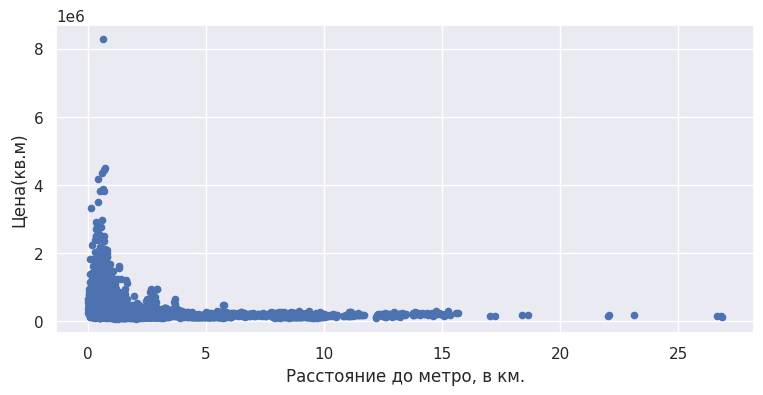

In [394]:
metro_2 = df.groupby('distance_to_nearest_metro')['unit_price'].agg(['count','median'])
metro_2 = metro_2.reset_index()

metro_2.plot.scatter(x = 'distance_to_nearest_metro', y = 'median', figsize = (9, 4))

plt.xlabel('Расстояние до метро, в км.')
plt.ylabel('Цена(кв.м)')
plt.xticks()
plt.show()

In [395]:
df[df.subway_time_1.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [396]:
df.subway_time_1.value_counts()

нет_пешей_доступности    19506
от_6_до_12_минут         18280
от_12_до_17_минут        11786
до_6_минут                9568
от_17_до_30_минут         9406
от_30_минут                 19
Name: subway_time_1, dtype: int64

In [397]:
f = df[df.subway_time_1 == 'нет_пешей_доступности']
f.subway_travel_type.unique()

array(['transport'], dtype=object)

#### Расстояние до центра

In [398]:
df[df.distance_to_centre.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [399]:
df.distance_to_centre.describe()

count    68565.000000
mean        15.609092
std          7.854263
min          0.668237
25%          9.650283
50%         15.418708
75%         21.583555
max         69.271561
Name: distance_to_centre, dtype: float64

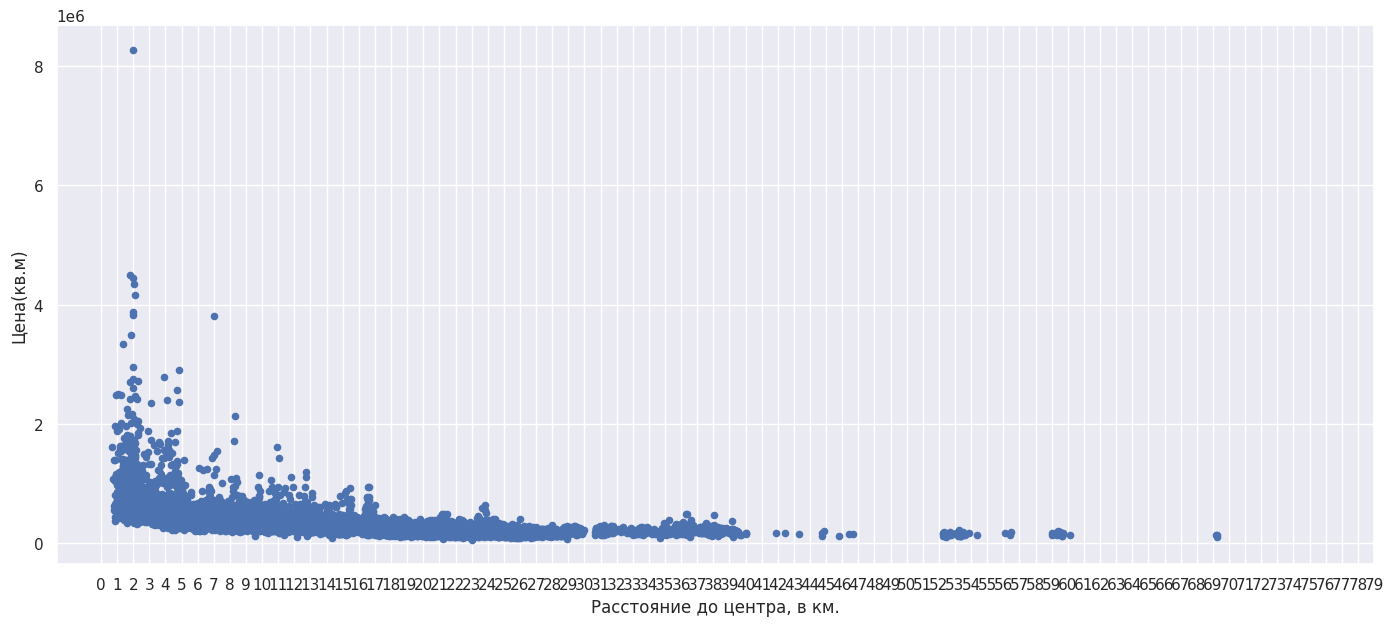

In [400]:
centre = df.groupby('distance_to_centre')['unit_price'].agg(['count','median'])
centre = centre.reset_index()

centre.plot.scatter(x = 'distance_to_centre', y = 'median', figsize = (17, 7))

plt.xlabel('Расстояние до центра, в км.')
plt.ylabel('Цена(кв.м)')
plt.xticks(range(0, 80, 1))
plt.show()

In [401]:
df[df.distance_to_centre_1.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [402]:
df.distance_to_centre_1.value_counts()

от_19_до_30_км    22632
от_8_до_14_км     16884
от_14_до_19_км    14163
от_5_до_8_км       6068
от_3_до_5_км       4012
до_3_км            2945
от_30_км           1861
Name: distance_to_centre_1, dtype: int64

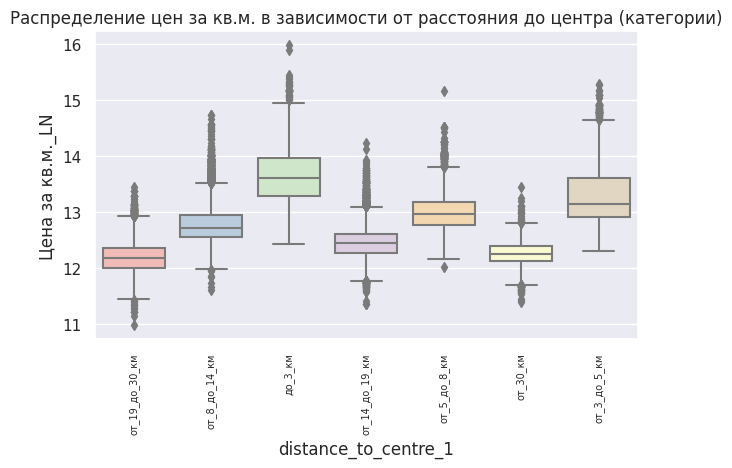

In [403]:
plt.figure(figsize = (7, 4))
sns.boxplot(data = df,
            y = np.log(df['unit_price']),
            x = df['distance_to_centre_1'], 
            palette = 'Pastel1'
            )
plt.ylabel('Цена за кв.м._LN')
plt.title('Распределение цен за кв.м. в зависимости от расстояния до центра (категории)')
plt.xticks(rotation = 90, fontsize = 7)
plt.show()

#### МКАД/за МкаД

In [404]:
df[df.rings_MKAD.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [405]:
df.rings_MKAD.unique()

array(['За_МКАД', 'внутри_МКАД'], dtype=object)

In [406]:
df.rings_MKAD.value_counts()

внутри_МКАД    37467
За_МКАД        31098
Name: rings_MKAD, dtype: int64

#### Москва/область

In [407]:
df[df.geo_region.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [408]:
df.geo_region.value_counts()

Москва                46155
Московская область    22410
Name: geo_region, dtype: int64

In [409]:
m = df[df.geo_region == 'Москва']
m.geo_city_okrug_1.unique()

array(['ЗАО', 'САО', 'СВАО', 'ЮВАО', 'ЦАО',
       'Новомосковский_административный_округ', 'ЮАО', 'ВАО', 'СЗАО',
       'ЮЗАО', 'Троицкий_административный_округ', 'Зеленоград'],
      dtype=object)

In [410]:
mo = df[df.geo_region == 'Московская область']
mo.geo_city_okrug_1.unique()

array(['МО_З', 'МО_ЮВ', 'МО_В', 'МО_СВ', 'МО_СЗ', 'МО_ЮЗ', 'МО_С', 'МО_Ю'],
      dtype=object)

#### Районы

In [411]:
df[df.geo_city_district_1.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [412]:
df.geo_city_district_1.unique()

array(['Красногорск', 'Дзержинский', 'Балашиха-2', 'ЗАО_Крылатское',
       'САО_Войковский', 'СВАО_Марфино', 'СВАО_Северный', 'ЮВАО_Люблино',
       'ЦАО_Якиманка', 'Королев', 'ЦАО_Пресненский', 'ЦАО_Арбат', 'Химки',
       'НАО_Щербинка', 'ЗАО_Проспект_Вернадского',
       'ЗАО_Тропарево-Никулино', 'НАО_Филимонковский',
       'ЮАО_Нагатино-Садовники', 'ЦАО_Хамовники', 'ВАО_Гольяново',
       'ЗАО_Раменки', 'ЮВАО_Южнопортовый', 'СЗАО_Куркино', 'ЦАО_Тверской',
       'СВАО_Бутырский', 'ЦАО_Басманный', 'ЦАО_Таганский', 'Путилково',
       'Реутов', 'ЗАО_Солнцево', 'Одинцово', 'Островцы',
       'ЮАО_Даниловский', 'Долгопрудный', 'САО_Аэропорт',
       'САО_Тимирязевский', 'ЮЗАО_Обручевский', 'Восточное_Бутово_ЖК',
       'НАО_Коммунарка', 'ЗАО_Можайский', 'Люберцы', 'СВАО_Ростокино',
       'САО_Дмитровский', 'Планерная_Новогорск_парк', 'Мытищи',
       'ЮВАО Марьино', 'Ольгино_мкр', 'ТАО_Троицк', 'ВАО_Ивановское',
       'ВАО_Некрасовка', 'ЮЗАО_Ломоносовский', 'САО_Хорошёвский',
     

In [413]:
dist = pd.DataFrame(df['geo_city_district_1'].value_counts())
s_1 = dist['geo_city_district_1'] <= 100
print(dist[s_1]['geo_city_district_1'].sum())
dist[s_1]

1375


,geo_city_district_1
Марусино,93
Мотяково,93
1_Мая_мкр,91
Салтыковка_мкр,89
ЗАО_Рублёво-Архангельское,87
САО_Молжаниновский,79
СВАО_Алтуфьевский,78
ЮВАО_Капотня,64
Ромашково,61
Булатниково_мкр,60


In [414]:
df.columns

Index(['cian_id', 'photo', 'url', 'bargainterms_price',
       'bargainterms_price_LN', 'area_total', 'area_total_1', 'unit_price',
       'unit_price_LN', 'rooms_count', 'rooms_count_1', 'floor_1', 'floor',
       'floors_count', 'wall_type', 'last_edited', 'repair_type', 'lat', 'lng',
       'lat_lng', 'geo_region', 'geo_settlement_1', 'geo_city_okrug_1',
       'geo_city_district_1', 'geo_street', 'geo_house_num',
       'distance_to_centre', 'distance_to_centre_1', 'rings_MSK', 'rings_MKAD',
       'subway_name', 'subway_travel_type', 'subway_time_1', 'subway_time',
       'nearest_metro', 'distance_to_nearest_metro', 'description', 'ptn_dadd',
       'Регион_enc', 'med_price', 'Районы_Kmeans', 'type', 'address_elit'],
      dtype='object')

In [415]:
r = 'ВАО_Восточный'

k = df[df['geo_city_district_1'] == r]['Районы_Kmeans'].values[0]
print(k)

df[df['Районы_Kmeans'] == k]['geo_city_district_1'].unique()

5


array(['НАО_Щербинка', 'НАО_Филимонковский', 'ТАО_Троицк',
       'ВАО_Ивановское', 'ВАО_Некрасовка', 'Зеленоград',
       'ЮАО_Бирюлёво_Западное', 'ЮАО_Бирюлёво_Восточное', 'ВАО_Вешняки',
       'ВАО_Восточный', 'САО_Молжаниновский', 'ЮВАО_Капотня'],
      dtype=object)

In [416]:
df['geo_city_district_1'] = df['geo_city_district_1'].replace('Марусино', 'Марусино_Мотяково_Малаховка_Жилино_1_Коренёво')
df['geo_city_district_1'] = df['geo_city_district_1'].replace('Мотяково', 'Марусино_Мотяково_Малаховка_Жилино_1_Коренёво')
df['geo_city_district_1'] = df['geo_city_district_1'].replace('Малаховка', 'Марусино_Мотяково_Малаховка_Жилино_1_Коренёво')
df['geo_city_district_1'] = df['geo_city_district_1'].replace('Жилино-1', 'Марусино_Мотяково_Малаховка_Жилино_1_Коренёво')
df['geo_city_district_1'] = df['geo_city_district_1'].replace('Коренёво', 'Марусино_Мотяково_Малаховка_Жилино_1_Коренёво')

df['geo_city_district_1'] = df['geo_city_district_1'].replace('Расторгуево', 'Расторгуево_Усадьба_Суханово_Измайлово_Булатниково')
df['geo_city_district_1'] = df['geo_city_district_1'].replace('Усадьба_Суханово_ЖК', 'Расторгуево_Усадьба_Суханово_Измайлово_Булатниково')
df['geo_city_district_1'] = df['geo_city_district_1'].replace('Измайлово_рабпос', 'Расторгуево_Усадьба_Суханово_Измайлово_Булатниково')
df['geo_city_district_1'] = df['geo_city_district_1'].replace('Булатниково_мкр', 'Расторгуево_Усадьба_Суханово_Измайлово_Булатниково')

df['geo_city_district_1'] = df['geo_city_district_1'].replace('Керамик_мкр', 'Керамик_мкр_Кучино_мкр')
df['geo_city_district_1'] = df['geo_city_district_1'].replace('Кучино_мкр', 'Керамик_мкр_Кучино_мкр')

df['geo_city_district_1'] = df['geo_city_district_1'].replace('Совхоз_им_Ленина', 'Развилка_Совхоз_им_Ленина')
df['geo_city_district_1'] = df['geo_city_district_1'].replace('Развилка', 'Развилка_Совхоз_им_Ленина')

df['geo_city_district_1'] = df['geo_city_district_1'].replace('Салтыковка_мкр', 'Салтыковка_мкр_Дзержинского_мкр')
df['geo_city_district_1'] = df['geo_city_district_1'].replace('Дзержинского_мкр', 'Салтыковка_мкр_Дзержинского_мкр')

df['geo_city_district_1'] = df['geo_city_district_1'].replace('Дрожжино', 'Дрожжино_Бутово_Парк')
df['geo_city_district_1'] = df['geo_city_district_1'].replace('Бутово_Парк_ЖК', 'Дрожжино_Бутово_Парк')

df['geo_city_district_1'] = df['geo_city_district_1'].replace('СВАО_Алтуфьевский', 'СВАО_Алтуфьевский_СВАО_Лианозово')
df['geo_city_district_1'] = df['geo_city_district_1'].replace('СВАО_Лианозово', 'СВАО_Алтуфьевский_СВАО_Лианозово')

df['geo_city_district_1'] = df['geo_city_district_1'].replace('ТАО_Краснопахорский', 'ТАО_Краснопахорский_Бекасово_Вороново')
df['geo_city_district_1'] = df['geo_city_district_1'].replace('ТАО_Бекасово', 'ТАО_Краснопахорский_Бекасово_Вороново')
df['geo_city_district_1'] = df['geo_city_district_1'].replace('ТАО_Вороново', 'ТАО_Краснопахорский_Бекасово_Вороново')

In [417]:
dist = pd.DataFrame(df['geo_city_district_1'].value_counts())
s_1 = dist['geo_city_district_1'] <= 100
print(dist[s_1]['geo_city_district_1'].sum())
dist[s_1]

554


,geo_city_district_1
1_Мая_мкр,91
ЗАО_Рублёво-Архангельское,87
САО_Молжаниновский,79
ЮВАО_Капотня,64
Ромашково,61
ЗАО_ИЦ_Сколково,53
Бородино,43
ВАО_Восточный,28
Архангельское,21
Новый_мкр,10


In [418]:
df = df[(df['geo_city_district_1'] != 'Новый_мкр') & (df['geo_city_district_1'] != 'Новый') & (df['geo_city_district_1'] != 'Малаховский_квартал_Заречье')]

dist = pd.DataFrame(df['geo_city_district_1'].value_counts())
s_1 = dist['geo_city_district_1'] <= 100
print(dist[s_1]['geo_city_district_1'].sum())
dist[s_1]

527


,geo_city_district_1
1_Мая_мкр,91
ЗАО_Рублёво-Архангельское,87
САО_Молжаниновский,79
ЮВАО_Капотня,64
Ромашково,61
ЗАО_ИЦ_Сколково,53
Бородино,43
ВАО_Восточный,28
Архангельское,21


In [419]:
df.reset_index(drop = True , inplace = True )
df

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit
0,238345845,https://images.cdn-cian.ru/images/78/391/501/k...,https://www.cian.ru/sale/flat/238345845,13140000,16.391172,65.7,от_65_до_85,199999.0,12.206068,2-комн.,3-к,последний,8,8,Монолитный,2024-10-04 00:00:00,no,55.81953,37.24588,55.81953 37.24588,Московская область,Красногорск,МО_З,Красногорск,улица Пришвина,15,24.614772,от_19_до_30_км,За_МКАД,За_МКАД,Опалиха,walk,до_6_минут,6.0,D2_Опалиха,0.416612,Вашему вниманию предлагается 2-х комнатная ква...,2024-10-16 00:00:00,1,208979.0,4,нет,нет
1,239198805,https://images.cdn-cian.ru/images/3/648/639/93...,https://www.cian.ru/sale/flat/239198805,7550000,15.837058,50.0,от_42_до_65,151000.0,11.925035,2-комн.,2-к,первый,1,2,Кирпичный,2024-09-28 00:00:00,cosmetic,55.63384,37.84267,55.63384 37.84267,Московская область,Дзержинский,МО_ЮВ,Дзержинский,улица Строителей,10,19.198938,от_19_до_30_км,За_МКАД,За_МКАД,Котельники,transport,нет_пешей_доступности,10.0,Таганско_Краснопресненская_Котельники,4.589888,"Квартира для тех, кто ценит тишину и спокойст...",2024-10-16 00:00:00,1,159635.0,1,нет,нет
2,240154473,https://images.cdn-cian.ru/images/1/673/449/kv...,https://www.cian.ru/sale/flat/240154473,6100000,15.623799,42.2,от_42_до_65,144549.0,11.881374,1-комн.,2-к,этажи_2-5,4,17,Панельный,2024-10-03 00:00:00,euro,55.83250,37.97867,55.8325 37.97867,Московская область,Балашиха-2,МО_В,Балашиха-2,улица 40 лет Победы,29,23.995573,от_19_до_30_км,За_МКАД,За_МКАД,Щёлковская,transport,нет_пешей_доступности,16.0,D5_Балашиха_Балашиха,3.110049,Ян. Квартира в хорошем состоянии! Один взрослы...,2024-10-16 00:00:00,1,152859.0,1,нет,нет
3,239293843,https://images.cdn-cian.ru/images/2071196285-1...,https://www.cian.ru/sale/flat/239293843,75000000,18.132999,130.0,более_105,576923.0,13.265464,3-комн.,4+,этажи_24-33,27,34,Монолитный,2024-09-25 00:00:00,design,55.76035,37.41940,55.76035 37.4194,Москва,Москва,ЗАО,ЗАО_Крылатское,улица Крылатские Холмы,37,12.673599,от_8_до_14_км,МКАД,внутри_МКАД,Крылатское,walk,от_6_до_12_минут,11.0,Арбатско_Покровская_Крылатское,0.805016,Лот 57704 Вашему вниманию предлагается 3-комна...,2024-10-16 00:00:00,0,376190.0,12,нет,нет
4,239383173,https://images.cdn-cian.ru/images/5/153/839/kv...,https://www.cian.ru/sale/flat/239383173,264200000,19.392217,330.0,более_105,800606.0,13.593124,4+-комн.,4+,этажи_2-5,2,12,Монолитный,2024-09-30 00:00:00,design,55.83210,37.48396,55.8321 37.48396,Москва,Москва,САО,САО_Войковский,Ленинградское шоссе,37к1,12.275179,от_8_до_14_км,МКАД,внутри_МКАД,Войковская,transport,нет_пешей_доступности,3.0,Замоскворецкая_Водный_стадион,0.873577,"ЖК ""Город Яхт"" 2007 года постройки. Охраняемая...",2024-10-16 00:00:00,0,357142.0,10,нет,нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68533,308587244,https://images.cdn-cian.ru/images/2296625570-1...,https://www.cian.ru/sale/flat/308587244,16000000,16.588099,64.0,от_42_до_65,250000.0,12.429216,3-комн.,2-к,этажи_6-9,7,13,Монолитный,2024-10-15 00:00:00,design,55.59151,37.44731,55.59151 37.44731,Москва,Москва,Новомосковский_административный_округ,НАО_Коммунарка,проспект Магеллана,2,21.053203,от_19_до_30_км,За_МКАД,За_МКАД,Прокшино,walk,от_17_до_30_минут,23.0,Сокольническая_Прокшино,1.065145,"Арт. 75920357 Продам квартиру в новом доме, с ...",2024-10-16 00:00:00,0,272760.0,7,нет,нет
68534,308599940,https://images.cdn-cian.ru/images/kvartira-mos...,https://www.cian.ru/sa

In [420]:
df['med_price'] = df.groupby('geo_city_district_1')['unit_price'].transform('median').round()
#df['med_distance'] = df.groupby('Районы_2')['Раст_центр'].transform('median').round()

X_clust = df[['geo_city_district_1', 'Регион_enc', 'med_price']].copy()
X_clust = X_clust.sort_values('med_price', ascending = False)
X_clust = X_clust.drop_duplicates(['geo_city_district_1']).reset_index().drop(columns = 'index') # убиваем дубли по Районы_2 мз-за САО_ЦАО_Беговой_Пресненский
X_clust

,geo_city_district_1,Регион_enc,med_price
0,ЦАО_Хамовники,0,1164794.0
1,ЦАО_Арбат,0,862637.0
2,ЦАО_Пресненский,0,717270.0
3,ЦАО_Замоскворечье,0,663716.0
4,ЦАО_Тверской,0,651906.0
...,...,...,...
177,Томилино,1,151331.0
178,Октябрьский,1,147776.0
179,Марусино_Мотяково_Малаховка_Жилино_1_Коренёво,1,146400.0
180,Островцы,1,138983.0


#### Районы Kmeans

In [421]:
X_clust[X_clust.duplicated(['geo_city_district_1']) == True]

,geo_city_district_1,Регион_enc,med_price


In [422]:
features = ['Регион_enc', 'med_price']

In [423]:
current_label = 20

scaler = StandardScaler()  # Стандартизируем данные
scaled_features = scaler.fit_transform(X_clust[features])

kmeans = KMeans(n_clusters = current_label, random_state = 42)
kmeans.fit(scaled_features)   

X_clust['Kmeans_2'] = kmeans.labels_
X_clust

,geo_city_district_1,Регион_enc,med_price,Kmeans_2
0,ЦАО_Хамовники,0,1164794.0,6
1,ЦАО_Арбат,0,862637.0,3
2,ЦАО_Пресненский,0,717270.0,16
3,ЦАО_Замоскворечье,0,663716.0,7
4,ЦАО_Тверской,0,651906.0,7
...,...,...,...,...
177,Томилино,1,151331.0,1
178,Октябрьский,1,147776.0,1
179,Марусино_Мотяково_Малаховка_Жилино_1_Коренёво,1,146400.0,1
180,Островцы,1,138983.0,1


In [424]:
mapping = {}

for i, row in X_clust.iterrows():                                                    
    if row['Kmeans_2'] not in mapping:
        mapping[row['Kmeans_2']] = current_label
        current_label -= 1

X_clust['Kmeans_2'] = X_clust['Kmeans_2'].map(mapping)
X_clust = X_clust.sort_values('Kmeans_2', ascending = False) 
X_clust.reset_index(drop = True , inplace = True )
X_clust

,geo_city_district_1,Регион_enc,med_price,Kmeans_2
0,ЦАО_Хамовники,0,1164794.0,20
1,ЦАО_Арбат,0,862637.0,19
2,ЦАО_Пресненский,0,717270.0,18
3,ЦАО_Замоскворечье,0,663716.0,17
4,ЦАО_Тверской,0,651906.0,17
...,...,...,...,...
177,Дзержинский,1,159635.0,2
178,Железнодорожный_мкр,1,161920.0,2
179,Ольгино_мкр,1,163758.0,2
180,Лыткарино,1,138297.0,2


In [425]:
table_comp = X_clust.groupby('Kmeans_2')['med_price'].agg(['min', 'max'])
table_comp.columns = ['median_min', 'median_max']
table_comp['Прирост_med'] = table_comp['median_max'].pct_change() 
table_comp['Районы_2'] = X_clust.groupby('Kmeans_2').apply(lambda x: list(x['geo_city_district_1']))
pd.set_option('display.max_colwidth', None)
table_comp

,median_min,median_max,Прирост_med,Районы_2
Kmeans_2,,,,
1,156234.0,156234.0,NaN,[ТАО_Краснопахорский_Бекасово_Вороново]
2,138297.0,163758.0,0.048159,"[Керамик_мкр_Кучино_мкр, Островцы, Марусино_Мотяково_Малаховка_Жилино_1_Коренёво, Октябрьский, Томилино, Балашиха-2, Балашиха-1, Молоково, Красково, Павлино_мкр, Расторгуево_Усадьба_Суханово_Измайлово_Булатниково, Дзержинский, Железнодорожный_мкр, Ольгино_мкр, Лыткарино]"
3,167419.0,186885.0,0.141227,"[Восточное_Бутово_ЖК, Королев, Салтыковка_мкр_Дзержинского_мкр, Новое_Измайлово_мкр, ВНИИССОК, Видное, Сапроново, Саввино_мкр, Янтарный_мкр, Дрожжино_Бутово_Парк, Мисайлово, Клязьма, Люберцы, Архангельское, Котельники, 1_Мая_мкр]"
4,189795.0,209069.0,0.118704,"[Лопатино, Планерная_Новогорск_парк, Мытищи, Томилино_Парк_ЖК, Развилка_Совхоз_им_Ленина, Зенино, Немчиновка, Трехгорка, Путилково, Одинцово, Глухово_Ильинское-Усово_Бузланово, Красногорск, Долгопрудный, Химки]"
5,204663.0,246328.0,0.178214,"[САО_Молжаниновский, ВАО_Вешняки, ТАО_Троицк, Зеленоград, ЮВАО_Капотня, ЮАО_Бирюлёво_Восточное, НАО_Филимонковский, ВАО_Некрасовка, ЮАО_Бирюлёво_Западное, ВАО_Восточный, НАО_Щербинка]"
6,219642.0,265387.0,0.077372,"[Отрадное, Реутов, Бородино, Южная_Битца_ЖК, Измайловский_Лес_ЖК, Новоивановское, Нагорное, Ромашково]"
7,247582.0,276680.0,0.042553,"[ЮВАО_Жулебино, ЮВАО_Печатники, ЮАО_Орехово-Борисово_Южное, НАО_Внуково, ЮАО_Чертаново_Центральное, ВАО_Новокосино, ЮАО_Зябликово, ЮЗАО_Южное Бутово, СВАО_Бибирево, ЮВАО_Выхино-Жулебино, ВАО_Косино-Ухтомский, ВАО_Ивановское, ЗАО_Ново-Переделкино, САО_Ховрино, ЮАО_Братеево, СВАО_Алтуфьевский_СВАО_Лианозово, ЮАО_Орехово-Борисово_Северное, ЮЗАО_Ясенево, СВАО_Лосиноостровский, ЮЗАО_Северное Бутово, ЮВАО Марьино, НАО_Коммунарка, СВАО_Ярославский, ЮВАО_Люблино, ВАО_Гольяново, САО_Восточное_Дегунино]"
8,280937.0,303308.0,0.096241,"[ЮАО_Царицыно, ЮАО_Москворечье-Сабурово, СЗАО_Северное_Тушино, СВАО_Северный, СВАО_Северное_Медведково, ВАО_Северное_Измайлово, СВАО_Отрадное, СЗАО_Южное_Тушино, СВАО_Южное_Медведково, ВАО_Восточное_Измайлово, ВАО_Перово, САО_Дмитровский, ЮВАО_Текстильщики, ВАО_Новогиреево, САО_Западное_Дегунино, ЮЗАО_Теплый_Стан, СВАО_Бабушкинский, САО_Коптево, ЮВАО_Рязанский, ЗАО_ИЦ_Сколково, ЗАО_Солнцево, ЗАО_Рублёво-Архангельское, ВАО_Измайлово, ЮВАО_Кузьминки, ЮАО_Чертаново_Южное, СЗАО_Митино]"
9,304764.0,328834.0,0.084159,"[СЗАО_Куркино, САО_Бескудниковский, САО_Головинский, ВАО_Соколиная_Гора, ЮЗАО_Коньково, ВАО_Метрогородок, СЗАО_Строгино, СВАО_Ростокино, ЮАО_Чертаново_Северное, ВАО_Богородское, ЮВАО_Нижегородский, ЗАО_Можайский, ЮАО_Нагорный, ВАО_Преображенское]"


In [438]:
mapping = dict(zip(X_clust['geo_city_district_1'], X_clust['Kmeans_2']))  # Делаем словарь, который сопоставляет Районы_2 (это индекс!) и Районы_Kmeans в df_1
df['Районы_Kmeans'] = df['geo_city_district_1'].apply(lambda x: mapping.get(x))  # добавляем столбец в df
df.head(10)

/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit
0,238345845,https://images.cdn-cian.ru/images/78/391/501/k...,https://www.cian.ru/sale/flat/238345845,13140000,16.391172,65.7,от_65_до_85,199999.0,12.206068,2-комн.,3-к,последний,8,8,Монолитный,2024-10-04 00:00:00,no,55.81953,37.24588,55.81953 37.24588,Московская область,Красногорск,МО_З,Красногорск,улица Пришвина,15,24.614772,от_19_до_30_км,За_МКАД,За_МКАД,Опалиха,walk,до_6_минут,6.0,D2_Опалиха,0.416612,Вашему вниманию предлагается 2-х комнатная ква...,2024-10-16 00:00:00,1,208979.0,4,нет,нет
1,239198805,https://images.cdn-cian.ru/images/3/648/639/93...,https://www.cian.ru/sale/flat/239198805,7550000,15.837058,50.0,от_42_до_65,151000.0,11.925035,2-комн.,2-к,первый,1,2,Кирпичный,2024-09-28 00:00:00,cosmetic,55.63384,37.84267,55.63384 37.84267,Московская область,Дзержинский,МО_ЮВ,Дзержинский,улица Строителей,10,19.198938,от_19_до_30_км,За_МКАД,За_МКАД,Котельники,transport,нет_пешей_доступности,10.0,Таганско_Краснопресненская_Котельники,4.589888,"Квартира для тех, кто ценит тишину и спокойст...",2024-10-16 00:00:00,1,159635.0,2,нет,нет
2,240154473,https://images.cdn-cian.ru/images/1/673/449/kv...,https://www.cian.ru/sale/flat/240154473,6100000,15.623799,42.2,от_42_до_65,144549.0,11.881374,1-комн.,2-к,этажи_2-5,4,17,Панельный,2024-10-03 00:00:00,euro,55.83250,37.97867,55.8325 37.97867,Московская область,Балашиха-2,МО_В,Балашиха-2,улица 40 лет Победы,29,23.995573,от_19_до_30_км,За_МКАД,За_МКАД,Щёлковская,transport,нет_пешей_доступности,16.0,D5_Балашиха_Балашиха,3.110049,Ян. Квартира в хорошем состоянии! Один взрослы...,2024-10-16 00:00:00,1,152876.0,2,нет,нет
3,239293843,https://images.cdn-cian.ru/images/2071196285-1...,https://www.cian.ru/sale/flat/239293843,75000000,18.132999,130.0,более_105,576923.0,13.265464,3-комн.,4+,этажи_24-33,27,34,Монолитный,2024-09-25 00:00:00,design,55.76035,37.41940,55.76035 37.4194,Москва,Москва,ЗАО,ЗАО_Крылатское,улица Крылатские Холмы,37,12.673599,от_8_до_14_км,МКАД,внутри_МКАД,Крылатское,walk,от_6_до_12_минут,11.0,Арбатско_Покровская_Крылатское,0.805016,Лот 57704 Вашему вниманию предлагается 3-комна...,2024-10-16 00:00:00,0,376190.0,12,нет,нет
4,239383173,https://images.cdn-cian.ru/images/5/153/839/kv...,https://www.cian.ru/sale/flat/239383173,264200000,19.392217,330.0,более_105,800606.0,13.593124,4+-комн.,4+,этажи_2-5,2,12,Монолитный,2024-09-30 00:00:00,design,55.83210,37.48396,55.8321 37.48396,Москва,Москва,САО,САО_Войковский,Ленинградское шоссе,37к1,12.275179,от_8_до_14_км,МКАД,внутри_МКАД,Войковская,transport,нет_пешей_доступности,3.0,Замоскворецкая_Водный_стадион,0.873577,"ЖК ""Город Яхт"" 2007 года постройки. Охраняемая...",2024-10-16 00:00:00,0,357142.0,10,нет,нет
5,239678768,https://images.cdn-cian.ru/images/7/757/049/kv...,https://www.cian.ru/sale/flat/239678768,9700000,16.087636,31.4,от_28_до_42,308917.0,12.640828,1-комн.,1-к,последний,9,9,Панельный,2024-10-14 00:00:00,cosmetic,55.83099,37.58890,55.83099 37.5889,Москва,Москва,СВАО,СВАО_Марфино,улица Академика Комарова,14А,8.871644,от_8_до_14_км,ЧТК,внутри_МКАД,Фонвизинская,walk,от_12_до_17_минут,14.0,Люблинско_Дмитровская_Фонвизинская,0.828432,Продается светлая и теплая однокомнатная кварт...,2024-10-16 00:00:00,0,367894.0,12,нет,нет
6,238392047,https://images.cdn-cian.ru/images/9/632/039/kv...,https://www.cian.ru/sale/flat/238392047,16500000,16.618871,58.8,от_42_до_65,280612.0,12.544728,2-комн.,2-к,этажи_6-9,8,14,Панельный,2024-09-21 00:00:00,cosmetic,55.92773,37.54198,55.92773 37.54198,Москва,Москва,СВАО,СВАО_Се

In [439]:
df[df.Районы_Kmeans.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [440]:
df.Районы_Kmeans.value_counts()

7     9385
4     9273
8     7083
3     6543
2     4759
5     4205
9     3848
15    3430
12    3350
13    3339
16    3120
10    2693
6     1645
17    1456
18    1354
20    1307
14    1149
19     281
1      165
11     152
Name: Районы_Kmeans, dtype: int64

#### Округа

In [441]:
df[df.geo_city_okrug_1.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [442]:
df.geo_city_okrug_1.unique()

array(['МО_З', 'МО_ЮВ', 'МО_В', 'ЗАО', 'САО', 'СВАО', 'ЮВАО', 'ЦАО',
       'МО_СВ', 'МО_СЗ', 'Новомосковский_административный_округ', 'ЮАО',
       'ВАО', 'СЗАО', 'МО_ЮЗ', 'МО_С', 'ЮЗАО', 'МО_Ю',
       'Троицкий_административный_округ', 'Зеленоград'], dtype=object)

In [443]:
df.geo_city_okrug_1.value_counts()

ЗАО                                      6470
ЦАО                                      5943
ЮАО                                      4761
МО_ЮВ                                    4541
МО_В                                     4527
САО                                      4402
ВАО                                      4378
ЮЗАО                                     4193
ЮВАО                                     3838
Новомосковский_административный_округ    3733
СВАО                                     3628
СЗАО                                     3353
МО_СВ                                    2839
МО_Ю                                     2773
МО_З                                     2747
МО_ЮЗ                                    2204
МО_СЗ                                    2069
Троицкий_административный_округ           833
МО_С                                      683
Зеленоград                                622
Name: geo_city_okrug_1, dtype: int64

In [444]:
df.Районы_Kmeans.value_counts()

7     9385
4     9273
8     7083
3     6543
2     4759
5     4205
9     3848
15    3430
12    3350
13    3339
16    3120
10    2693
6     1645
17    1456
18    1354
20    1307
14    1149
19     281
1      165
11     152
Name: Районы_Kmeans, dtype: int64

#### Кольца

In [445]:
df[df.rings_MSK.isnull()]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit


In [446]:
df.rings_MSK.value_counts()

За_МКАД           31071
МКАД              17635
ЧТК               12755
ТТК                4884
Садовое_кольцо     2192
Name: rings_MSK, dtype: int64

In [447]:
# схлапываем все до СК в СК
df['rings_MSK'] = np.where((df['rings_MSK'] == 'Бульварное_кольцо') | (df['rings_MSK'] == 'Замоскворечье_до_СК') | (df['rings_MSK'] == 'Остров_Балчуг'), 'Садовое_кольцо', df['rings_MSK'])
df.rings_MSK.value_counts()

/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


За_МКАД           31071
МКАД              17635
ЧТК               12755
ТТК                4884
Садовое_кольцо     2192
Name: rings_MSK, dtype: int64

#### Возвращаем на место ГП

In [448]:
df = df[df.floors_count < 80]
df.reset_index(drop = True , inplace = True )
df

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit
0,238345845,https://images.cdn-cian.ru/images/78/391/501/k...,https://www.cian.ru/sale/flat/238345845,13140000,16.391172,65.7,от_65_до_85,199999.0,12.206068,2-комн.,3-к,последний,8,8,Монолитный,2024-10-04 00:00:00,no,55.81953,37.24588,55.81953 37.24588,Московская область,Красногорск,МО_З,Красногорск,улица Пришвина,15,24.614772,от_19_до_30_км,За_МКАД,За_МКАД,Опалиха,walk,до_6_минут,6.0,D2_Опалиха,0.416612,Вашему вниманию предлагается 2-х комнатная ква...,2024-10-16 00:00:00,1,208979.0,4,нет,нет
1,239198805,https://images.cdn-cian.ru/images/3/648/639/93...,https://www.cian.ru/sale/flat/239198805,7550000,15.837058,50.0,от_42_до_65,151000.0,11.925035,2-комн.,2-к,первый,1,2,Кирпичный,2024-09-28 00:00:00,cosmetic,55.63384,37.84267,55.63384 37.84267,Московская область,Дзержинский,МО_ЮВ,Дзержинский,улица Строителей,10,19.198938,от_19_до_30_км,За_МКАД,За_МКАД,Котельники,transport,нет_пешей_доступности,10.0,Таганско_Краснопресненская_Котельники,4.589888,"Квартира для тех, кто ценит тишину и спокойст...",2024-10-16 00:00:00,1,159635.0,2,нет,нет
2,240154473,https://images.cdn-cian.ru/images/1/673/449/kv...,https://www.cian.ru/sale/flat/240154473,6100000,15.623799,42.2,от_42_до_65,144549.0,11.881374,1-комн.,2-к,этажи_2-5,4,17,Панельный,2024-10-03 00:00:00,euro,55.83250,37.97867,55.8325 37.97867,Московская область,Балашиха-2,МО_В,Балашиха-2,улица 40 лет Победы,29,23.995573,от_19_до_30_км,За_МКАД,За_МКАД,Щёлковская,transport,нет_пешей_доступности,16.0,D5_Балашиха_Балашиха,3.110049,Ян. Квартира в хорошем состоянии! Один взрослы...,2024-10-16 00:00:00,1,152876.0,2,нет,нет
3,239293843,https://images.cdn-cian.ru/images/2071196285-1...,https://www.cian.ru/sale/flat/239293843,75000000,18.132999,130.0,более_105,576923.0,13.265464,3-комн.,4+,этажи_24-33,27,34,Монолитный,2024-09-25 00:00:00,design,55.76035,37.41940,55.76035 37.4194,Москва,Москва,ЗАО,ЗАО_Крылатское,улица Крылатские Холмы,37,12.673599,от_8_до_14_км,МКАД,внутри_МКАД,Крылатское,walk,от_6_до_12_минут,11.0,Арбатско_Покровская_Крылатское,0.805016,Лот 57704 Вашему вниманию предлагается 3-комна...,2024-10-16 00:00:00,0,376190.0,12,нет,нет
4,239383173,https://images.cdn-cian.ru/images/5/153/839/kv...,https://www.cian.ru/sale/flat/239383173,264200000,19.392217,330.0,более_105,800606.0,13.593124,4+-комн.,4+,этажи_2-5,2,12,Монолитный,2024-09-30 00:00:00,design,55.83210,37.48396,55.8321 37.48396,Москва,Москва,САО,САО_Войковский,Ленинградское шоссе,37к1,12.275179,от_8_до_14_км,МКАД,внутри_МКАД,Войковская,transport,нет_пешей_доступности,3.0,Замоскворецкая_Водный_стадион,0.873577,"ЖК ""Город Яхт"" 2007 года постройки. Охраняемая...",2024-10-16 00:00:00,0,357142.0,10,нет,нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68532,308587244,https://images.cdn-cian.ru/images/2296625570-1...,https://www.cian.ru/sale/flat/308587244,16000000,16.588099,64.0,от_42_до_65,250000.0,12.429216,3-комн.,2-к,этажи_6-9,7,13,Монолитный,2024-10-15 00:00:00,design,55.59151,37.44731,55.59151 37.44731,Москва,Москва,Новомосковский_административный_округ,НАО_Коммунарка,проспект Магеллана,2,21.053203,от_19_до_30_км,За_МКАД,За_МКАД,Прокшино,walk,от_17_до_30_минут,23.0,Сокольническая_Прокшино,1.065145,"Арт. 75920357 Продам квартиру в новом доме, с ...",2024-10-16 00:00:00,0,272760.0,7,нет,нет
68533,308599940,https://images.cdn-cian.ru/images/kvartira-mos...,https://www.cian.ru/sa

In [449]:
year_df = pd.read_csv('White_ЦИАН_Мск_год.csv')
year_df

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,bti_year_built,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_travel_type,subway_time_1,subway_name,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Районы_Kmeans
0,238345845,https://images.cdn-cian.ru/images/78/391/501/k...,https://www.cian.ru/sale/flat/238345845,13140000,16.391172,65.7,от_65_до_85,199999.0,12.206068,2-комн.,3-к,последний,8.0,8,Монолитный,2024-10-04 00:00:00,no,2020.0,55.81953,37.24588,55.81953 37.24588,Московская область,Красногорск,МО_З,Красногорск,улица Пришвина,15,24.614772,от_19_до_30_км,За_МКАД,За_МКАД,walk,до_6_минут,Опалиха,6.0,D2_Опалиха,0.416612,Вашему вниманию предлагается 2-х комнатная ква...,2024-10-16 00:00:00,4
1,239198805,https://images.cdn-cian.ru/images/3/648/639/93...,https://www.cian.ru/sale/flat/239198805,7550000,15.837058,50.0,от_42_до_65,151000.0,11.925035,2-комн.,2-к,первый,1.0,2,Кирпичный,2024-09-28 00:00:00,cosmetic,1956.0,55.63384,37.84267,55.63384 37.84267,Московская область,Дзержинский,МО_ЮВ,Дзержинский,улица Строителей,10,19.198938,от_19_до_30_км,За_МКАД,За_МКАД,transport,нет_пешей_доступности,Котельники,10.0,Таганско_Краснопресненская_Котельники,4.589888,"Квартира для тех, кто ценит тишину и спокойст...",2024-10-16 00:00:00,1
2,240154473,https://images.cdn-cian.ru/images/1/673/449/kv...,https://www.cian.ru/sale/flat/240154473,6100000,15.623799,42.2,от_42_до_65,144549.0,11.881374,1-комн.,2-к,этажи_2-5,4.0,17,Панельный,2024-10-03 00:00:00,euro,2008.0,55.83250,37.97867,55.8325 37.97867,Московская область,Балашиха-2,МО_В,Балашиха-2,улица 40 лет Победы,29,23.995573,от_19_до_30_км,За_МКАД,За_МКАД,transport,нет_пешей_доступности,Щёлковская,16.0,D5_Балашиха_Балашиха,3.110049,Ян. Квартира в хорошем состоянии! Один взрослы...,2024-10-16 00:00:00,1
3,239293843,https://images.cdn-cian.ru/images/2071196285-1...,https://www.cian.ru/sale/flat/239293843,75000000,18.132999,130.0,более_105,576923.0,13.265464,3-комн.,4+,этажи_24-33,27.0,34,Монолитный,2024-09-25 00:00:00,design,2006.0,55.76035,37.41940,55.76035 37.4194,Москва,Москва,ЗАО,ЗАО_Крылатское,улица Крылатские Холмы,37,12.673599,от_8_до_14_км,МКАД,внутри_МКАД,walk,от_6_до_12_минут,Крылатское,11.0,Арбатско_Покровская_Крылатское,0.805016,Лот 57704 Вашему вниманию предлагается 3-комна...,2024-10-16 00:00:00,12
4,239383173,https://images.cdn-cian.ru/images/5/153/839/kv...,https://www.cian.ru/sale/flat/239383173,264200000,19.392217,330.0,более_105,800606.0,13.593124,4+-комн.,4+,этажи_2-5,2.0,12,Монолитный,2024-09-30 00:00:00,design,2007.0,55.83210,37.48396,55.8321 37.48396,Москва,Москва,САО,САО_Войковский,Ленинградское шоссе,37к1,12.275179,от_8_до_14_км,МКАД,внутри_МКАД,transport,нет_пешей_доступности,Войковская,3.0,Замоскворецкая_Водный_стадион,0.873577,"ЖК ""Город Яхт"" 2007 года постройки. Охраняемая...",2024-10-16 00:00:00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68559,308587244,https://images.cdn-cian.ru/images/2296625570-1...,https://www.cian.ru/sale/flat/308587244,16000000,16.588099,64.0,от_42_до_65,250000.0,12.429216,3-комн.,2-к,этажи_6-9,7.0,13,Монолитный,2024-10-15 00:00:00,design,2020.0,55.59151,37.44731,55.59151 37.44731,Москва,Москва,Новомосковский_административный_округ,НАО_Коммунарка,проспект Магеллана,2,21.053203,от_19_до_30_км,За_МКАД,За_МКАД,walk,от_17_до_30_минут,Прокшино,23.0,Сокольническая_Прокшино,1.065145,"Арт. 75920357 Продам квартиру в новом доме, с ...",2024-10-16 00:00:00,7
68560,308599940,https://images.cdn-cian.ru/images/kvartira-mos...,https://www.cian.ru/sale/flat/308599940,22500000,16.929026,84.2,от_65_до_85,267220.0,12.495828,3-комн.,3-к,этажи_2-5,5

In [450]:
year_df.bti_year_built.unique()

array([2020., 1956., 2008., 2006., 2007., 1964., 1970., 2002., 1962.,
       1947., 1998., 1967., 2015., 2011., 1910., 1976., 2019., 2022.,
       2004., 2003., 2016., 2017., 1939., 2014., 2012., 2001., 1900.,
       2018., 1989., 1911., 1965., 1987., 1957., 2009., 1978., 1960.,
       1930., 2013., 1907., 2021., 1999., 1963., 1971., 2010., 1972.,
       1955., 2005., 1908., 1968., 1959., 1973., 1977., 1940., 1997.,
       1986., 1958., 1950., 1984., 1929., 1974., 1980., 1933., 1975.,
       1988., 1992., 2023., 1994., 1985., 1961., 1969., 1979., 1899.,
       1917., 1928., 2000., 1991., 1993., 1981., 1927., 1953., 1941.,
       1966., 1894., 1954., 1951., 1952., 1901., 1996., 1983., 1932.,
       1926., 1982., 1990., 1995., 1938., 1892., 1931., 1912., 2024.,
       1913., 1935., 1904., 1937., 1946., 1914., 1949., 1925., 1902.,
       1905., 1906., 1934., 1945., 1903., 1948., 1896., 1924., 1936.,
       1915., 1919., 1916., 1943., 1909., 1898., 1920., 1895., 1922.,
       1942., 1944.,

In [451]:
mapping_2 = dict(zip(year_df['cian_id'], year_df['bti_year_built']))  
df['bti_year_built'] = df['cian_id'].apply(lambda x: mapping_2.get(x))  
df.head(10)

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit,bti_year_built
0,238345845,https://images.cdn-cian.ru/images/78/391/501/k...,https://www.cian.ru/sale/flat/238345845,13140000,16.391172,65.7,от_65_до_85,199999.0,12.206068,2-комн.,3-к,последний,8,8,Монолитный,2024-10-04 00:00:00,no,55.81953,37.24588,55.81953 37.24588,Московская область,Красногорск,МО_З,Красногорск,улица Пришвина,15,24.614772,от_19_до_30_км,За_МКАД,За_МКАД,Опалиха,walk,до_6_минут,6.0,D2_Опалиха,0.416612,Вашему вниманию предлагается 2-х комнатная ква...,2024-10-16 00:00:00,1,208979.0,4,нет,нет,2020.0
1,239198805,https://images.cdn-cian.ru/images/3/648/639/93...,https://www.cian.ru/sale/flat/239198805,7550000,15.837058,50.0,от_42_до_65,151000.0,11.925035,2-комн.,2-к,первый,1,2,Кирпичный,2024-09-28 00:00:00,cosmetic,55.63384,37.84267,55.63384 37.84267,Московская область,Дзержинский,МО_ЮВ,Дзержинский,улица Строителей,10,19.198938,от_19_до_30_км,За_МКАД,За_МКАД,Котельники,transport,нет_пешей_доступности,10.0,Таганско_Краснопресненская_Котельники,4.589888,"Квартира для тех, кто ценит тишину и спокойст...",2024-10-16 00:00:00,1,159635.0,2,нет,нет,1956.0
2,240154473,https://images.cdn-cian.ru/images/1/673/449/kv...,https://www.cian.ru/sale/flat/240154473,6100000,15.623799,42.2,от_42_до_65,144549.0,11.881374,1-комн.,2-к,этажи_2-5,4,17,Панельный,2024-10-03 00:00:00,euro,55.83250,37.97867,55.8325 37.97867,Московская область,Балашиха-2,МО_В,Балашиха-2,улица 40 лет Победы,29,23.995573,от_19_до_30_км,За_МКАД,За_МКАД,Щёлковская,transport,нет_пешей_доступности,16.0,D5_Балашиха_Балашиха,3.110049,Ян. Квартира в хорошем состоянии! Один взрослы...,2024-10-16 00:00:00,1,152876.0,2,нет,нет,2008.0
3,239293843,https://images.cdn-cian.ru/images/2071196285-1...,https://www.cian.ru/sale/flat/239293843,75000000,18.132999,130.0,более_105,576923.0,13.265464,3-комн.,4+,этажи_24-33,27,34,Монолитный,2024-09-25 00:00:00,design,55.76035,37.41940,55.76035 37.4194,Москва,Москва,ЗАО,ЗАО_Крылатское,улица Крылатские Холмы,37,12.673599,от_8_до_14_км,МКАД,внутри_МКАД,Крылатское,walk,от_6_до_12_минут,11.0,Арбатско_Покровская_Крылатское,0.805016,Лот 57704 Вашему вниманию предлагается 3-комна...,2024-10-16 00:00:00,0,376190.0,12,нет,нет,2006.0
4,239383173,https://images.cdn-cian.ru/images/5/153/839/kv...,https://www.cian.ru/sale/flat/239383173,264200000,19.392217,330.0,более_105,800606.0,13.593124,4+-комн.,4+,этажи_2-5,2,12,Монолитный,2024-09-30 00:00:00,design,55.83210,37.48396,55.8321 37.48396,Москва,Москва,САО,САО_Войковский,Ленинградское шоссе,37к1,12.275179,от_8_до_14_км,МКАД,внутри_МКАД,Войковская,transport,нет_пешей_доступности,3.0,Замоскворецкая_Водный_стадион,0.873577,"ЖК ""Город Яхт"" 2007 года постройки. Охраняемая...",2024-10-16 00:00:00,0,357142.0,10,нет,нет,2007.0
5,239678768,https://images.cdn-cian.ru/images/7/757/049/kv...,https://www.cian.ru/sale/flat/239678768,9700000,16.087636,31.4,от_28_до_42,308917.0,12.640828,1-комн.,1-к,последний,9,9,Панельный,2024-10-14 00:00:00,cosmetic,55.83099,37.58890,55.83099 37.5889,Москва,Москва,СВАО,СВАО_Марфино,улица Академика Комарова,14А,8.871644,от_8_до_14_км,ЧТК,внутри_МКАД,Фонвизинская,walk,от_12_до_17_минут,14.0,Люблинско_Дмитровская_Фонвизинская,0.828432,Продается светлая и теплая однокомнатная кварт...,2024-10-16 00:00:00,0,367894.0,12,нет,нет,1964.0
6,238392047,https://images.cdn-cian.ru/images/9/632/039/kv...,https://www.cian.ru/sale/flat/238392047,16500000,16.618871,58.8,от_42_до_65,280612.0,12.544728,2-комн.,2-к,этажи_6-9,8,14,Панельный,2024-09-21 00:00:00,cosmetic,55.92

In [452]:
df['bti_year_built'] = df['bti_year_built'].astype(int)

In [453]:
df.bti_year_built.unique()

array([2020, 1956, 2008, 2006, 2007, 1964, 1970, 2002, 1962, 1947, 1998,
       1967, 2015, 2011, 1910, 1976, 2019, 2022, 2004, 2003, 2016, 2017,
       1939, 2014, 2012, 2001, 1900, 2018, 1989, 1911, 1965, 1987, 1957,
       2009, 1978, 1960, 1930, 2013, 1907, 2021, 1999, 1963, 1971, 2010,
       1972, 1955, 2005, 1908, 1968, 1959, 1973, 1977, 1940, 1997, 1986,
       1958, 1950, 1984, 1929, 1974, 1980, 1933, 1975, 1988, 1992, 2023,
       1994, 1985, 1961, 1969, 1979, 1899, 1917, 1928, 2000, 1991, 1993,
       1981, 1927, 1953, 1941, 1966, 1894, 1954, 1951, 1952, 1901, 1996,
       1983, 1932, 1926, 1982, 1990, 1995, 1938, 1892, 1931, 1912, 2024,
       1913, 1935, 1904, 1937, 1946, 1914, 1949, 1925, 1902, 1905, 1906,
       1934, 1945, 1903, 1948, 1896, 1924, 1936, 1915, 1919, 1916, 1943,
       1909, 1898, 1920, 1895, 1922, 1942, 1944, 1923, 1891])

#### Допроверяем элитку

In [454]:
df.type.unique()

array(['нет', 'престижный', 'престижный+'], dtype=object)

In [455]:
df_elit = df[(df.type == 'престижный') | (df.type == 'престижный+')]
df_elit.reset_index(drop = True , inplace = True )
df_elit.head()

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit,bti_year_built
0,239001047,https://images.cdn-cian.ru/images/2276841802-1...,https://www.cian.ru/sale/flat/239001047,170000000,18.951309,290.60,более_105,584996.0,13.279360,4+-комн.,4+,этажи_2-5,5,17,Монолитно-кирпичный,2024-10-10 00:00:00,no,55.75146,37.57736,55.75146 37.57736,Москва,Москва,ЦАО,ЦАО_Арбат,улица Новый Арбат,29,2.774367,до_3_км,ТТК,внутри_МКАД,Смоленская,walk,до_6_минут,6.0,Арбатско_Покровская_Смоленская,0.408218,Лот f20802 В продажу предлагается большая квар...,2024-10-16 00:00:00,0,862637.0,19,престижный,"улица Новый Арбат, 29, Москва",1998
1,235565015,https://images.cdn-cian.ru/images/0/324/709/kv...,https://www.cian.ru/sale/flat/235565015,417505000,19.849807,379.55,более_105,1099999.0,13.910820,4+-комн.,4+,этажи_2-5,5,10,Монолитный,2024-10-14 00:00:00,no,55.71600,37.50677,55.716 37.50677,Москва,Москва,ЗАО,ЗАО_Раменки,Минская улица,2Вк1,8.300579,от_8_до_14_км,ЧТК,внутри_МКАД,Раменки,transport,нет_пешей_доступности,6.0,D4_Минская,0.931367,ID: 2758. ДИЗАЙН-ПРОЕКТ В ПОДАРОК!!!\nПредлага...,2024-10-16 00:00:00,0,556862.0,16,престижный+,"Минская улица, 2Вк1, Москва",2019
2,233755593,https://images.cdn-cian.ru/images/kvartira-mos...,https://www.cian.ru/sale/flat/233755593,14500000,16.489659,28.40,от_28_до_42,510563.0,13.143269,студия,1-к,этажи_6-9,7,30,Монолитный,2024-09-27 00:00:00,euro,55.72067,37.68934,55.72067 37.68934,Москва,Москва,ЮВАО,ЮВАО_Южнопортовый,Волгоградский проспект,32/5к1,5.585998,от_5_до_8_км,ТТК,внутри_МКАД,Дубровка,walk,от_12_до_17_минут,17.0,Таганско_Краснопресненская_Волгоградский_проспект,0.485013,РИЕЛТОРЫ/специалисты по недвижимости и другие ...,2024-10-16 00:00:00,0,375207.0,12,престижный,"Волгоградский проспект, 32/5к3, Москва",2022
3,235048570,https://images.cdn-cian.ru/images/2090399464-1...,https://www.cian.ru/sale/flat/235048570,679070000,20.336235,363.00,более_105,1870716.0,14.441832,4+-комн.,4+,этажи_10-15,11,16,Монолитно-кирпичный,2024-10-07 00:00:00,euro,55.74076,37.58105,55.74076 37.58105,Москва,Москва,ЦАО,ЦАО_Хамовники,1-й Неопалимовский переулок,8,2.896508,до_3_км,ТТК,внутри_МКАД,Парк Культуры,walk,от_6_до_12_минут,12.0,Кольцевая_Киевская,0.904499,Продажа роскошного видового трехуровневого пен...,2024-10-16 00:00:00,0,1164794.0,20,престижный,"1-й Неопалимовский переулок, 8, Москва",2003
4,235191953,https://images.cdn-cian.ru/images/9/461/409/kv...,https://www.cian.ru/sale/flat/235191953,369880000,19.728689,220.00,более_105,1681272.0,14.335061,4+-комн.,4+,этажи_2-5,4,12,Кирпичный,2024-10-15 00:00:00,design,55.76925,37.60230,55.76925 37.6023,Москва,Москва,ЦАО,ЦАО_Тверской,Старопименовский переулок,10,2.140035,до_3_км,Садовое_кольцо,внутри_МКАД,Чеховская,walk,до_6_минут,6.0,Замоскворецкая_Маяковская,0.329209,ПРЯМОЙ ПРЕДСТАВИТЕЛЬ СОБСТВЕННИКА! БОНУС БРОКЕ...,2024-10-16 00:00:00,0,651906.0,17,престижный+,"Старопименовский переулок, 10, Москва",2006


In [456]:
len(df_elit)

2734

In [457]:
mapping_elit = dict(zip(df_elit['lat_lng'], df_elit['type']))  
df['is_elit'] = df['lat_lng'].apply(lambda x: mapping_elit.get(x))  
df.head(10)

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit,bti_year_built,is_elit
0,238345845,https://images.cdn-cian.ru/images/78/391/501/k...,https://www.cian.ru/sale/flat/238345845,13140000,16.391172,65.7,от_65_до_85,199999.0,12.206068,2-комн.,3-к,последний,8,8,Монолитный,2024-10-04 00:00:00,no,55.81953,37.24588,55.81953 37.24588,Московская область,Красногорск,МО_З,Красногорск,улица Пришвина,15,24.614772,от_19_до_30_км,За_МКАД,За_МКАД,Опалиха,walk,до_6_минут,6.0,D2_Опалиха,0.416612,Вашему вниманию предлагается 2-х комнатная ква...,2024-10-16 00:00:00,1,208979.0,4,нет,нет,2020,None
1,239198805,https://images.cdn-cian.ru/images/3/648/639/93...,https://www.cian.ru/sale/flat/239198805,7550000,15.837058,50.0,от_42_до_65,151000.0,11.925035,2-комн.,2-к,первый,1,2,Кирпичный,2024-09-28 00:00:00,cosmetic,55.63384,37.84267,55.63384 37.84267,Московская область,Дзержинский,МО_ЮВ,Дзержинский,улица Строителей,10,19.198938,от_19_до_30_км,За_МКАД,За_МКАД,Котельники,transport,нет_пешей_доступности,10.0,Таганско_Краснопресненская_Котельники,4.589888,"Квартира для тех, кто ценит тишину и спокойст...",2024-10-16 00:00:00,1,159635.0,2,нет,нет,1956,None
2,240154473,https://images.cdn-cian.ru/images/1/673/449/kv...,https://www.cian.ru/sale/flat/240154473,6100000,15.623799,42.2,от_42_до_65,144549.0,11.881374,1-комн.,2-к,этажи_2-5,4,17,Панельный,2024-10-03 00:00:00,euro,55.83250,37.97867,55.8325 37.97867,Московская область,Балашиха-2,МО_В,Балашиха-2,улица 40 лет Победы,29,23.995573,от_19_до_30_км,За_МКАД,За_МКАД,Щёлковская,transport,нет_пешей_доступности,16.0,D5_Балашиха_Балашиха,3.110049,Ян. Квартира в хорошем состоянии! Один взрослы...,2024-10-16 00:00:00,1,152876.0,2,нет,нет,2008,None
3,239293843,https://images.cdn-cian.ru/images/2071196285-1...,https://www.cian.ru/sale/flat/239293843,75000000,18.132999,130.0,более_105,576923.0,13.265464,3-комн.,4+,этажи_24-33,27,34,Монолитный,2024-09-25 00:00:00,design,55.76035,37.41940,55.76035 37.4194,Москва,Москва,ЗАО,ЗАО_Крылатское,улица Крылатские Холмы,37,12.673599,от_8_до_14_км,МКАД,внутри_МКАД,Крылатское,walk,от_6_до_12_минут,11.0,Арбатско_Покровская_Крылатское,0.805016,Лот 57704 Вашему вниманию предлагается 3-комна...,2024-10-16 00:00:00,0,376190.0,12,нет,нет,2006,None
4,239383173,https://images.cdn-cian.ru/images/5/153/839/kv...,https://www.cian.ru/sale/flat/239383173,264200000,19.392217,330.0,более_105,800606.0,13.593124,4+-комн.,4+,этажи_2-5,2,12,Монолитный,2024-09-30 00:00:00,design,55.83210,37.48396,55.8321 37.48396,Москва,Москва,САО,САО_Войковский,Ленинградское шоссе,37к1,12.275179,от_8_до_14_км,МКАД,внутри_МКАД,Войковская,transport,нет_пешей_доступности,3.0,Замоскворецкая_Водный_стадион,0.873577,"ЖК ""Город Яхт"" 2007 года постройки. Охраняемая...",2024-10-16 00:00:00,0,357142.0,10,нет,нет,2007,None
5,239678768,https://images.cdn-cian.ru/images/7/757/049/kv...,https://www.cian.ru/sale/flat/239678768,9700000,16.087636,31.4,от_28_до_42,308917.0,12.640828,1-комн.,1-к,последний,9,9,Панельный,2024-10-14 00:00:00,cosmetic,55.83099,37.58890,55.83099 37.5889,Москва,Москва,СВАО,СВАО_Марфино,улица Академика Комарова,14А,8.871644,от_8_до_14_км,ЧТК,внутри_МКАД,Фонвизинская,walk,от_12_до_17_минут,14.0,Люблинско_Дмитровская_Фонвизинская,0.828432,Продается светлая и теплая однокомнатная кварт...,2024-10-16 00:00:00,0,367894.0,12,нет,нет,1964,None
6,238392047,https://images.cdn-cian.ru/images/9/632/039/kv...,https://www.cian.ru/sale/flat/238392047,16500000,16.618871,58.8,от_42_до_65,280612.0,12.544728,2-комн.,2-к,этажи_6-9,8,14,Панельный,2024-09-

In [459]:
df['is_elit'] = np.where(df['is_elit'].isnull(), 'нет', df['is_elit'])

In [460]:
df['is_elit'].unique()

array(['нет', 'престижный', 'престижный+'], dtype=object)

#### Дорабатываем метро (неважно + нет пешей доступности)

In [461]:
df.subway_time_1.value_counts()

нет_пешей_доступности    19488
от_6_до_12_минут         18280
от_12_до_17_минут        11786
до_6_минут                9568
от_17_до_30_минут         9396
от_30_минут                 19
Name: subway_time_1, dtype: int64

In [462]:
df['subway_time_1'] = np.where(df['subway_time_1'] == 'от_30_минут', 'нет_пешей_доступности', df['subway_time_1'])
df['subway_time_1'] = np.where((df['is_elit'] == 'престижный') | (df['is_elit'] == 'престижный+'), 'неважно', df['subway_time_1'])
df.subway_time_1.value_counts()

нет_пешей_доступности    19346
от_6_до_12_минут         16845
от_12_до_17_минут        11169
до_6_минут                9017
от_17_до_30_минут         8932
неважно                   3228
Name: subway_time_1, dtype: int64

#### Склеиваем адрес

In [467]:
address = []

for i in tqdm(range(len(df))):
    if df['geo_region'][i] == 'Московская область':
        address.append(f"{df['geo_region'][i]}, {df['geo_city_district_1'][i]}, {df['geo_street'][i]}, {df['geo_house_num'][i]}")
    else:
        address.append(f"{df['geo_region'][i]}, {df['geo_street'][i]}, {df['geo_house_num'][i]}")
        
df['address_full'] = address
df.columns

100%|██████████| 68537/68537 [00:02<00:00, 26257.33it/s]


Index(['cian_id', 'photo', 'url', 'bargainterms_price',
       'bargainterms_price_LN', 'area_total', 'area_total_1', 'unit_price',
       'unit_price_LN', 'rooms_count', 'rooms_count_1', 'floor_1', 'floor',
       'floors_count', 'wall_type', 'last_edited', 'repair_type', 'lat', 'lng',
       'lat_lng', 'geo_region', 'geo_settlement_1', 'geo_city_okrug_1',
       'geo_city_district_1', 'geo_street', 'geo_house_num',
       'distance_to_centre', 'distance_to_centre_1', 'rings_MSK', 'rings_MKAD',
       'subway_name', 'subway_travel_type', 'subway_time_1', 'subway_time',
       'nearest_metro', 'distance_to_nearest_metro', 'description', 'ptn_dadd',
       'Регион_enc', 'med_price', 'Районы_Kmeans', 'type', 'address_elit',
       'bti_year_built', 'is_elit', 'address_full'],
      dtype='object')

In [498]:
#df.to_csv('White_ЦИАН_Мск_МО.csv')

#### Реновация

In [530]:
renovation_m = pd.read_excel('renovation_m.xlsx', sheet_name = 0)
renovation_m
renovation_m = renovation_m[renovation_m.status_code == 'OLD']
renovation_m.reset_index(drop = True , inplace = True )
renovation_m

,Адрес,Адрес_new,lat,lon,status_code
0,"1-й Ботанический проезд, дом 1","1-й Ботанический проезд, 1",55.8502,37.6340,OLD
1,"1-й Ботанический проезд, дом 3","1-й Ботанический проезд, 3",55.8510,37.6343,OLD
2,"1-й Ботанический проезд, дом 3А","1-й Ботанический проезд, 3А",55.8511,37.6336,OLD
3,"1-й Волоколамский проезд, дом 7, корпус 1","1-й Волоколамский проезд, 7К1",55.8008,37.4918,OLD
4,"1-й Волоколамский проезд, дом 7, корпус 2","1-й Волоколамский проезд, 7К2",55.8007,37.4911,OLD
...,...,...,...,...,...
5171,"Ярцевская улица, дом 5","Ярцевская улица, 5",55.7356,37.4066,OLD
5172,"Ярцевская улица, дом 7","Ярцевская улица, 7",55.7357,37.4076,OLD
5173,"Ярцевская улица, дом 9","Ярцевская улица, 9",55.7363,37.4076,OLD
5174,"Яснополянская улица, дом 3, корпус 1","Яснополянская улица, 3К1",55.7222,37.7876,OLD


In [531]:
df_m = df[df.geo_region == 'Москва']
df_m.reset_index(drop = True , inplace = True )
len(df_m)

46154

In [533]:
df_m = df_m[(df_m.bti_year_built >= 1958) & (df_m.bti_year_built <= 1968)]
df_m.reset_index(drop = True , inplace = True )
len(df_m)

6460

In [534]:
df_m = df_m[df_m.floors_count <= 9]
df_m.reset_index(drop = True , inplace = True )
len(df_m)

5262

In [535]:
address_2 = []

for i in tqdm(range(len(df_m))):
        address_2.append(f"{df_m['geo_street'][i]}, {df_m['geo_house_num'][i]}")
        
df_m['address_m'] = address_2
df_m.columns

100%|██████████| 5262/5262 [00:00<00:00, 51766.47it/s]


Index(['cian_id', 'photo', 'url', 'bargainterms_price',
       'bargainterms_price_LN', 'area_total', 'area_total_1', 'unit_price',
       'unit_price_LN', 'rooms_count', 'rooms_count_1', 'floor_1', 'floor',
       'floors_count', 'wall_type', 'last_edited', 'repair_type', 'lat', 'lng',
       'lat_lng', 'geo_region', 'geo_settlement_1', 'geo_city_okrug_1',
       'geo_city_district_1', 'geo_street', 'geo_house_num',
       'distance_to_centre', 'distance_to_centre_1', 'rings_MSK', 'rings_MKAD',
       'subway_name', 'subway_travel_type', 'subway_time_1', 'subway_time',
       'nearest_metro', 'distance_to_nearest_metro', 'description', 'ptn_dadd',
       'Регион_enc', 'med_price', 'Районы_Kmeans', 'type', 'address_elit',
       'bti_year_built', 'is_elit', 'address_full', 'address_m'],
      dtype='object')

In [536]:
table1 = df_m[['cian_id', 'lat', 'lng', 'address_m']]
table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5262 entries, 0 to 5261
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cian_id    5262 non-null   int64  
 1   lat        5262 non-null   float64
 2   lng        5262 non-null   float64
 3   address_m  5262 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 164.6+ KB


In [537]:
table2 = renovation_m[['lat', 'lon', 'Адрес_new', 'status_code']]
table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lat          5176 non-null   float64
 1   lon          5176 non-null   float64
 2   Адрес_new    5176 non-null   object 
 3   status_code  5176 non-null   object 
dtypes: float64(2), object(2)
memory usage: 161.9+ KB


In [521]:
def calculate_distance(lat1, lon1, lat2, lon2):
    # Преобразуем градусы в радианы
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    
    # Создаем массив для координат
    coords_1 = np.array([[lat1_rad, lon1_rad]])
    coords_2 = np.array([[lat2_rad, lon2_rad]])
    
    # Вычисляем расстояние
    return haversine_distances(coords_1, coords_2) * 6371000  # Умножаем на радиус Земли в метрах

In [538]:
# Создаем новый столбец для хранения индексов схожих объектов
table1['similar_indices'] = [[] for _ in range(len(table1))]
table1['distance'] = [[] for _ in range(len(table1))]
# Для сравнения адресов
table1['address_ratio'] = [[] for _ in range(len(table1))]
table1['address_partial_ratio'] = [[] for _ in range(len(table1))]
table1['address_token_sort_ratio'] = [[] for _ in range(len(table1))]
table1['address_token_set_ratio'] = [[] for _ in range(len(table1))]
table1['address_SeqMatcher_ratio'] = [[] for _ in range(len(table1))]
table1['address_cosine_sim'] = [[] for _ in range(len(table1))]

# Определяем порог расстояния (в метрах)
distance_threshold = 40 #26

# Вычисляем расстояния и заполняем столбец
for i, row1 in tqdm(table1.iterrows(), total = table1.shape[0], position = 0):
    for j, row2 in table2.iterrows():
        distance = calculate_distance(row1['lat'], row1['lng'], row2['lat'], row2['lon'])
        if distance < distance_threshold:
            
            ratio = fuzz.ratio(table1['address_m'][i], table2['Адрес_new'][j])                         # простой алгоритм схожести
            partial_ratio = fuzz.partial_ratio(table1['address_m'][i], table2['Адрес_new'][j])         # хорошо ищет, когда в адресе есть пропуски (наилучш. частич. совпадение)
            token_sort_ratio = fuzz.token_sort_ratio(table1['address_m'][i], table2['Адрес_new'][j])   # разбивает на токены, сортирует, хорош когда есть перестановка слов
            token_set_ratio = fuzz.token_set_ratio(table1['address_m'][i], table2['Адрес_new'][j])     # аналогичен предыдущему, но игнорирует дубли токенов
            
            SequenceMatcher_ratio = difflib.SequenceMatcher(None, table1['address_m'][i].lower(), table2['Адрес_new'][j].lower()).ratio() # схожесть последовательностей
            
            vectorizer = TfidfVectorizer()
            tfidf_matrix = vectorizer.fit_transform([table1['address_m'][i], table2['Адрес_new'][j]])   # косинусное сходство между векторами
            cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
                     
            table1.at[i, 'similar_indices'].append(j)
            table1.at[i, 'distance'].append(round(distance[0][0], 1))
            table1.at[i, 'address_ratio'].append(ratio)
            table1.at[i, 'address_partial_ratio'].append(partial_ratio)
            table1.at[i, 'address_token_sort_ratio'].append(token_sort_ratio)
            table1.at[i, 'address_token_set_ratio'].append(token_set_ratio)
            table1.at[i, 'address_SeqMatcher_ratio'].append(round(SequenceMatcher_ratio, 2))
            table1.at[i, 'address_cosine_sim'].append(round(cosine_sim, 2))

/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [542]:
table1

,cian_id,lat,lng,address_m,similar_indices,distance,address_ratio,address_partial_ratio,address_token_sort_ratio,address_token_set_ratio,address_SeqMatcher_ratio,address_cosine_sim
0,239678768,55.83099,37.58890,"улица Академика Комарова, 14А",[],[],[],[],[],[],[],[]
1,246639755,55.78625,37.59014,"Порядковый переулок, 8",[],[],[],[],[],[],[],[]
2,265592320,55.83928,37.57480,"Дмитровское шоссе, 32К2",[],[],[],[],[],[],[],[]
3,281168843,55.69537,37.57415,"улица Ферсмана, 3К1",[],[],[],[],[],[],[],[]
4,281319523,55.74626,37.49850,"Барклая улица, 16К4",[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...
5257,308239495,55.78376,37.59098,"Новолесная улица, 18К1",[],[],[],[],[],[],[],[]
5258,308305502,55.71845,37.66279,"улица Симоновский Вал, 26К1",[],[],[],[],[],[],[],[]
5259,308397069,55.85398,37.50581,"Флотская улица, 56",[4919],[17.9],[100],[100],[100],[100],[1.0],[1.0]
5260,308406973,55.81174,37.55811,"улица Вучетича, 22",[],[],[],[],[],[],[],[]


In [513]:
table1.address_m.unique()

array(['улица Академика Комарова, 14А', 'Садовая-Кудринская улица, 28-30',
       'улица Остоженка, 7С1', ..., 'Новогиреевская улица, 47/26',
       'Флотская улица, 56', 'Хорошевское шоссе, 82К9'], dtype=object)

In [546]:
filtered_data = table1[table1['similar_indices'].apply(lambda x: len(x) > 0)]
filtered_data = filtered_data[filtered_data['address_token_set_ratio'].apply(lambda x: x[0] > 90)]
filtered_data.reset_index(drop = True , inplace = True )
filtered_data

,cian_id,lat,lng,address_m,similar_indices,distance,address_ratio,address_partial_ratio,address_token_sort_ratio,address_token_set_ratio,address_SeqMatcher_ratio,address_cosine_sim
0,292701173,55.67546,37.44949,"Озерная улица, 34К3",[2466],[7.2],[95],[95],[94],[94],[0.95],[0.5]
1,292717817,55.69841,37.82147,"Самаркандский бульвар, 13К3",[3252],[10.2],[100],[100],[100],[100],[1.0],[1.0]
2,290651933,55.80706,37.79937,"9-я Парковая улица, 66К1",[481],[15.7],[100],[100],[100],[100],[1.0],[1.0]
3,273017649,55.65013,37.56917,"Херсонская улица, 7К3","[4964, 4965]","[19.0, 32.8]","[100, 95]","[100, 95]","[100, 95]","[100, 95]","[1.0, 0.95]","[1.0, 0.5]"
4,194036691,55.77029,37.48356,"Карамышевская набережная, 8",[1739],[12.8],[100],[100],[100],[100],[1.0],[1.0]
...,...,...,...,...,...,...,...,...,...,...,...,...
697,308492846,55.75367,37.82708,"Федеративный проспект, 41",[4892],[14.5],[100],[100],[100],[100],[1.0],[1.0]
698,308549287,55.62351,37.66045,"Веселая улица, 33К5",[1067],[10.5],[95],[95],[94],[94],[0.95],[0.5]
699,308231092,55.67936,37.55474,"улица Архитектора Власова, 7К2","[3742, 3744]","[5.8, 35.9]","[100, 97]","[100, 97]","[100, 97]","[100, 97]","[1.0, 0.97]","[1.0, 0.6]"
700,308309321,55.80392,37.79483,"7-я Парковая улица, 31К2",[439],[9.9],[100],[100],[100],[100],[1.0],[1.0]


In [547]:
addr = []
tip = []

for i in range(len(filtered_data)):
    ind = [filtered_data['similar_indices'][i][0]]
    addr.append(table2.iloc[ind]['Адрес_new'].values[0])
    tip.append(table2.iloc[ind]['status_code'].values[0])

In [548]:
table_final = filtered_data[['cian_id', 'lat', 'lng', 'address_m', 'similar_indices', 'address_token_set_ratio']]
table_final['address_renovation'] = addr
table_final['status_code'] = tip
table_final

/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cian_id,lat,lng,address_m,similar_indices,address_token_set_ratio,address_renovation,status_code
0,292701173,55.67546,37.44949,"Озерная улица, 34К3",[2466],[94],"Озёрная улица, 34К3",OLD
1,292717817,55.69841,37.82147,"Самаркандский бульвар, 13К3",[3252],[100],"Самаркандский бульвар, 13К3",OLD
2,290651933,55.80706,37.79937,"9-я Парковая улица, 66К1",[481],[100],"9-я Парковая улица, 66К1",OLD
3,273017649,55.65013,37.56917,"Херсонская улица, 7К3","[4964, 4965]","[100, 95]","Херсонская улица, 7К3",OLD
4,194036691,55.77029,37.48356,"Карамышевская набережная, 8",[1739],[100],"Карамышевская набережная, 8",OLD
...,...,...,...,...,...,...,...,...
697,308492846,55.75367,37.82708,"Федеративный проспект, 41",[4892],[100],"Федеративный проспект, 41",OLD
698,308549287,55.62351,37.66045,"Веселая улица, 33К5",[1067],[94],"Весёлая улица, 33К5",OLD
699,308231092,55.67936,37.55474,"улица Архитектора Власова, 7К2","[3742, 3744]","[100, 97]","улица Архитектора Власова, 7К2",OLD
700,308309321,55.80392,37.79483,"7-я Парковая улица, 31К2",[439],[100],"7-я Парковая улица, 31К2",OLD


In [505]:
#writer = pd.ExcelWriter('!table_final.xlsx')
#table_final.to_excel(writer, 'table_final')
#writer.save()

In [549]:
mapping = dict(zip(table_final['cian_id'], table_final['status_code']))
df['is_renovation'] = df['cian_id'].apply(lambda x: mapping.get(x))

mapping = dict(zip(table_final['cian_id'], table_final['address_renovation']))
df['address_renovation'] = df['cian_id'].apply(lambda x: mapping.get(x))

df['is_renovation'] = np.where(df['is_renovation'].isnull(), 'нет', df['is_renovation'])
df['address_renovation'] = np.where(df['address_renovation'].isnull(), 'нет', df['address_renovation'])

df['is_renovation'].value_counts()

нет    67835
OLD      702
Name: is_renovation, dtype: int64

In [550]:
df.columns

Index(['cian_id', 'photo', 'url', 'bargainterms_price',
       'bargainterms_price_LN', 'area_total', 'area_total_1', 'unit_price',
       'unit_price_LN', 'rooms_count', 'rooms_count_1', 'floor_1', 'floor',
       'floors_count', 'wall_type', 'last_edited', 'repair_type', 'lat', 'lng',
       'lat_lng', 'geo_region', 'geo_settlement_1', 'geo_city_okrug_1',
       'geo_city_district_1', 'geo_street', 'geo_house_num',
       'distance_to_centre', 'distance_to_centre_1', 'rings_MSK', 'rings_MKAD',
       'subway_name', 'subway_travel_type', 'subway_time_1', 'subway_time',
       'nearest_metro', 'distance_to_nearest_metro', 'description', 'ptn_dadd',
       'Регион_enc', 'med_price', 'Районы_Kmeans', 'type', 'address_elit',
       'bti_year_built', 'is_elit', 'address_full', 'is_renovation',
       'address_renovation'],
      dtype='object')

#### Объем рынка

In [551]:
df['Объем_рынка'] = df.groupby('area_total_1')['area_total_1'].transform('count')
df['Объем_рынка'].value_counts()

25994    25994
18230    18230
10900    10900
6517      6517
4379      4379
2517      2517
Name: Объем_рынка, dtype: int64

In [553]:
#df.to_csv('White_ЦИАН_Мск_МО.csv')

In [554]:
df.columns

Index(['cian_id', 'photo', 'url', 'bargainterms_price',
       'bargainterms_price_LN', 'area_total', 'area_total_1', 'unit_price',
       'unit_price_LN', 'rooms_count', 'rooms_count_1', 'floor_1', 'floor',
       'floors_count', 'wall_type', 'last_edited', 'repair_type', 'lat', 'lng',
       'lat_lng', 'geo_region', 'geo_settlement_1', 'geo_city_okrug_1',
       'geo_city_district_1', 'geo_street', 'geo_house_num',
       'distance_to_centre', 'distance_to_centre_1', 'rings_MSK', 'rings_MKAD',
       'subway_name', 'subway_travel_type', 'subway_time_1', 'subway_time',
       'nearest_metro', 'distance_to_nearest_metro', 'description', 'ptn_dadd',
       'Регион_enc', 'med_price', 'Районы_Kmeans', 'type', 'address_elit',
       'bti_year_built', 'is_elit', 'address_full', 'is_renovation',
       'address_renovation', 'Объем_рынка'],
      dtype='object')

In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68537 entries, 0 to 68536
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cian_id                    68537 non-null  int64  
 1   photo                      68537 non-null  object 
 2   url                        68537 non-null  object 
 3   bargainterms_price         68537 non-null  int64  
 4   bargainterms_price_LN      68537 non-null  float64
 5   area_total                 68537 non-null  float64
 6   area_total_1               68537 non-null  object 
 7   unit_price                 68537 non-null  float64
 8   unit_price_LN              68537 non-null  float64
 9   rooms_count                68537 non-null  object 
 10  rooms_count_1              68537 non-null  object 
 11  floor_1                    68537 non-null  object 
 12  floor                      68537 non-null  int64  
 13  floors_count               68537 non-null  int

In [557]:
df['Районы_Kmeans_str'] = df['Районы_Kmeans'].astype(str)

In [559]:
#df.to_csv('White_ЦИАН_Мск_МО.csv')

# PHIK

In [560]:
df

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit,bti_year_built,is_elit,address_full,is_renovation,address_renovation,Объем_рынка,Районы_Kmeans_str
0,238345845,https://images.cdn-cian.ru/images/78/391/501/k...,https://www.cian.ru/sale/flat/238345845,13140000,16.391172,65.7,от_65_до_85,199999.0,12.206068,2-комн.,3-к,последний,8,8,Монолитный,2024-10-04 00:00:00,no,55.81953,37.24588,55.81953 37.24588,Московская область,Красногорск,МО_З,Красногорск,улица Пришвина,15,24.614772,от_19_до_30_км,За_МКАД,За_МКАД,Опалиха,walk,до_6_минут,6.0,D2_Опалиха,0.416612,Вашему вниманию предлагается 2-х комнатная ква...,2024-10-16 00:00:00,1,208979.0,4,нет,нет,2020,нет,"Московская область, Красногорск, улица Пришвин...",нет,нет,10900,4
1,239198805,https://images.cdn-cian.ru/images/3/648/639/93...,https://www.cian.ru/sale/flat/239198805,7550000,15.837058,50.0,от_42_до_65,151000.0,11.925035,2-комн.,2-к,первый,1,2,Кирпичный,2024-09-28 00:00:00,cosmetic,55.63384,37.84267,55.63384 37.84267,Московская область,Дзержинский,МО_ЮВ,Дзержинский,улица Строителей,10,19.198938,от_19_до_30_км,За_МКАД,За_МКАД,Котельники,transport,нет_пешей_доступности,10.0,Таганско_Краснопресненская_Котельники,4.589888,"Квартира для тех, кто ценит тишину и спокойст...",2024-10-16 00:00:00,1,159635.0,2,нет,нет,1956,нет,"Московская область, Дзержинский, улица Строите...",нет,нет,25994,2
2,240154473,https://images.cdn-cian.ru/images/1/673/449/kv...,https://www.cian.ru/sale/flat/240154473,6100000,15.623799,42.2,от_42_до_65,144549.0,11.881374,1-комн.,2-к,этажи_2-5,4,17,Панельный,2024-10-03 00:00:00,euro,55.83250,37.97867,55.8325 37.97867,Московская область,Балашиха-2,МО_В,Балашиха-2,улица 40 лет Победы,29,23.995573,от_19_до_30_км,За_МКАД,За_МКАД,Щёлковская,transport,нет_пешей_доступности,16.0,D5_Балашиха_Балашиха,3.110049,Ян. Квартира в хорошем состоянии! Один взрослы...,2024-10-16 00:00:00,1,152876.0,2,нет,нет,2008,нет,"Московская область, Балашиха-2, улица 40 лет П...",нет,нет,25994,2
3,239293843,https://images.cdn-cian.ru/images/2071196285-1...,https://www.cian.ru/sale/flat/239293843,75000000,18.132999,130.0,более_105,576923.0,13.265464,3-комн.,4+,этажи_24-33,27,34,Монолитный,2024-09-25 00:00:00,design,55.76035,37.41940,55.76035 37.4194,Москва,Москва,ЗАО,ЗАО_Крылатское,улица Крылатские Холмы,37,12.673599,от_8_до_14_км,МКАД,внутри_МКАД,Крылатское,walk,от_6_до_12_минут,11.0,Арбатско_Покровская_Крылатское,0.805016,Лот 57704 Вашему вниманию предлагается 3-комна...,2024-10-16 00:00:00,0,376190.0,12,нет,нет,2006,нет,"Москва, улица Крылатские Холмы, 37",нет,нет,6517,12
4,239383173,https://images.cdn-cian.ru/images/5/153/839/kv...,https://www.cian.ru/sale/flat/239383173,264200000,19.392217,330.0,более_105,800606.0,13.593124,4+-комн.,4+,этажи_2-5,2,12,Монолитный,2024-09-30 00:00:00,design,55.83210,37.48396,55.8321 37.48396,Москва,Москва,САО,САО_Войковский,Ленинградское шоссе,37к1,12.275179,от_8_до_14_км,МКАД,внутри_МКАД,Войковская,transport,нет_пешей_доступности,3.0,Замоскворецкая_Водный_стадион,0.873577,"ЖК ""Город Яхт"" 2007 года постройки. Охраняемая...",2024-10-16 00:00:00,0,357142.0,10,нет,нет,2007,нет,"Москва, Ленинградское шоссе, 37к1",нет,нет,6517,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68532,308587244,https://images.cdn-cian.ru/images/2296625570-1...,https://www.cian.ru/sale/flat/308587244,16000000,16.588099,64.0,от_42_до_65,250000.0,12.429216,

In [561]:
df.columns

Index(['cian_id', 'photo', 'url', 'bargainterms_price',
       'bargainterms_price_LN', 'area_total', 'area_total_1', 'unit_price',
       'unit_price_LN', 'rooms_count', 'rooms_count_1', 'floor_1', 'floor',
       'floors_count', 'wall_type', 'last_edited', 'repair_type', 'lat', 'lng',
       'lat_lng', 'geo_region', 'geo_settlement_1', 'geo_city_okrug_1',
       'geo_city_district_1', 'geo_street', 'geo_house_num',
       'distance_to_centre', 'distance_to_centre_1', 'rings_MSK', 'rings_MKAD',
       'subway_name', 'subway_travel_type', 'subway_time_1', 'subway_time',
       'nearest_metro', 'distance_to_nearest_metro', 'description', 'ptn_dadd',
       'Регион_enc', 'med_price', 'Районы_Kmeans', 'type', 'address_elit',
       'bti_year_built', 'is_elit', 'address_full', 'is_renovation',
       'address_renovation', 'Объем_рынка', 'Районы_Kmeans_str'],
      dtype='object')

In [562]:
X = df[[
        'bargainterms_price_LN', 
        'unit_price_LN', 
        'area_total',
        'floor', 
        'floor_1', 
        'floors_count',
        'is_elit', 
        'geo_region',
        'geo_city_district_1', 
        'Районы_Kmeans', 
        'rings_MSK', 
        'geo_city_okrug_1', 
        'distance_to_nearest_metro',
        'subway_time_1', 
        'distance_to_centre', 
        'distance_to_centre_1', 
        'rings_MKAD', 
        'repair_type',
        'is_renovation',
        'bti_year_built',
        'Объем_рынка'
      ]]

In [563]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68537 entries, 0 to 68536
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bargainterms_price_LN      68537 non-null  float64
 1   unit_price_LN              68537 non-null  float64
 2   area_total                 68537 non-null  float64
 3   floor                      68537 non-null  int64  
 4   floor_1                    68537 non-null  object 
 5   floors_count               68537 non-null  int64  
 6   is_elit                    68537 non-null  object 
 7   geo_region                 68537 non-null  object 
 8   geo_city_district_1        68537 non-null  object 
 9   Районы_Kmeans              68537 non-null  int64  
 10  rings_MSK                  68537 non-null  object 
 11  geo_city_okrug_1           68537 non-null  object 
 12  distance_to_nearest_metro  68537 non-null  float64
 13  subway_time_1              68537 non-null  obj

In [564]:
#X.to_csv('!Выборка_МиМО_second.csv')

interval columns not set, guessing: ['bargainterms_price_LN', 'unit_price_LN', 'area_total', 'floor', 'floors_count', 'Районы_Kmeans', 'distance_to_nearest_metro', 'distance_to_centre', 'bti_year_built', 'Объем_рынка']


<AxesSubplot:>

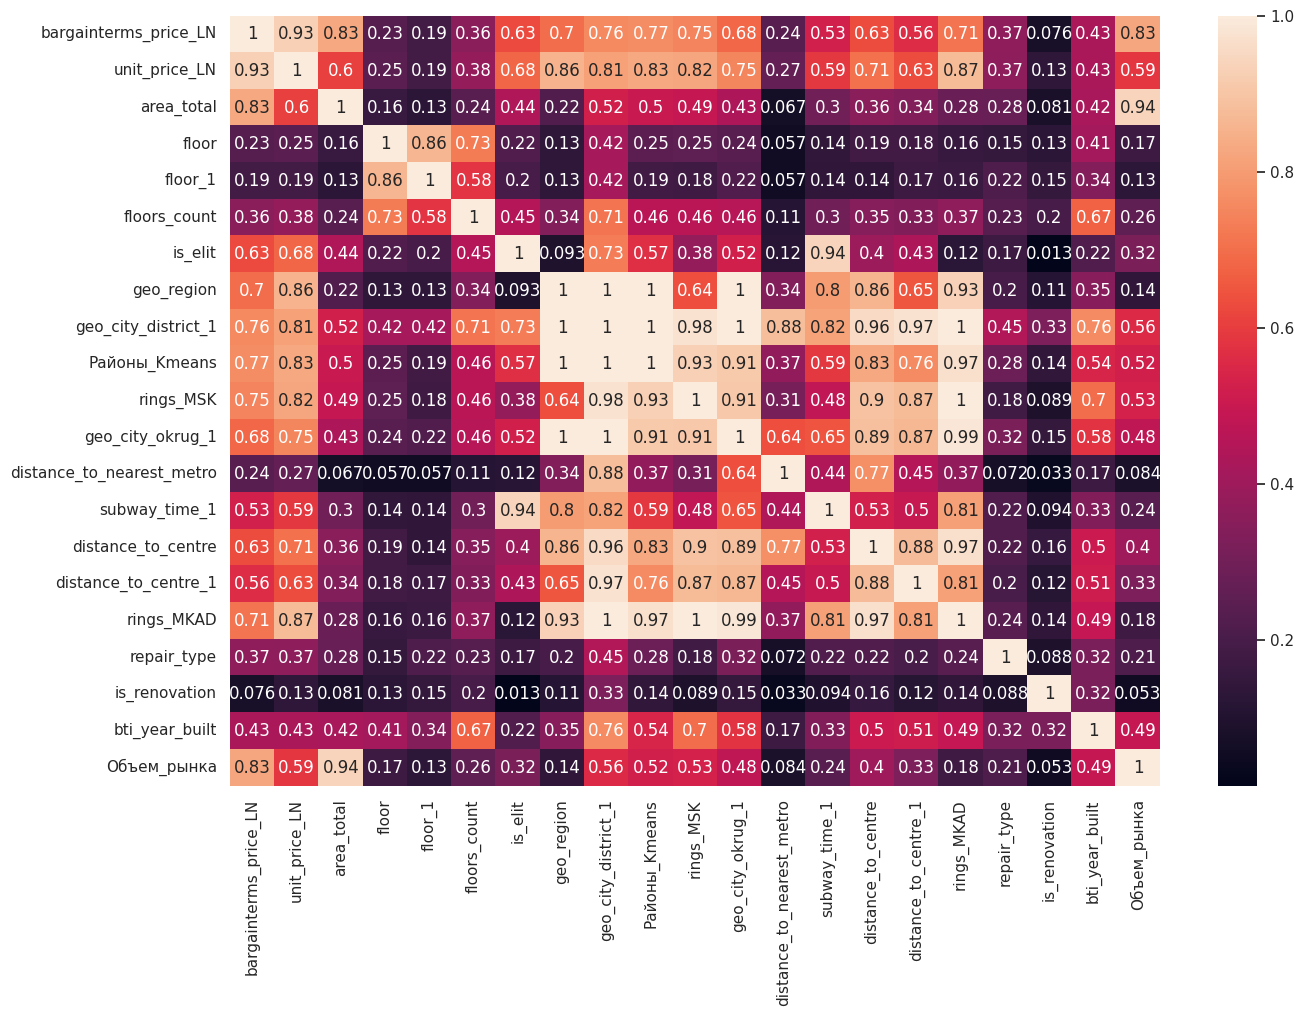

In [565]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

phik_overview = X.phik_matrix()

plt.figure(figsize = (15, 10))
sns.heatmap(phik_overview, annot = True)

In [570]:
df_old = df[df.geo_region == 'Москва']
df_old = df_old[(df_old.bti_year_built >= 1958) & (df_old.bti_year_built <= 1968)]
df_old = df_old[df_old.floors_count <= 9]
df_old.reset_index(drop = True , inplace = True )
len(df_old)

5262

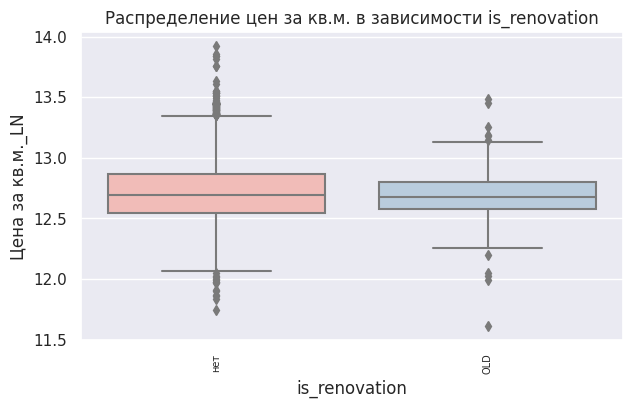

In [571]:
plt.figure(figsize = (7, 4))
sns.boxplot(data = df_old,
            y = np.log(df_old['unit_price']),
            x = df_old['is_renovation'], 
            palette = 'Pastel1'
            )
plt.ylabel('Цена за кв.м._LN')
plt.title('Распределение цен за кв.м. в зависимости is_renovation')
plt.xticks(rotation = 90, fontsize = 7)
plt.show()

In [572]:
X_fac = df[[
        'bargainterms_price_LN', 
        'area_total',
        #'floor', 
        'floor_1', 
        'floors_count',
        'is_elit', 
        'geo_region',
        #'geo_city_district_1', 
        #'Районы_Kmeans',
        'Районы_Kmeans_str', 
        'rings_MSK', 
        'geo_city_okrug_1', 
        #'distance_to_nearest_metro',
        'subway_time_1', 
        #'distance_to_centre', 
        'distance_to_centre_1', 
        'rings_MKAD', 
        'repair_type',
        #'is_renovation',
        'bti_year_built',
        'Объем_рынка'
      ]]

Y = 'bargainterms_price_LN'

In [573]:
X_fac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68537 entries, 0 to 68536
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bargainterms_price_LN  68537 non-null  float64
 1   area_total             68537 non-null  float64
 2   floor_1                68537 non-null  object 
 3   floors_count           68537 non-null  int64  
 4   is_elit                68537 non-null  object 
 5   geo_region             68537 non-null  object 
 6   Районы_Kmeans_str      68537 non-null  object 
 7   rings_MSK              68537 non-null  object 
 8   geo_city_okrug_1       68537 non-null  object 
 9   subway_time_1          68537 non-null  object 
 10  distance_to_centre_1   68537 non-null  object 
 11  rings_MKAD             68537 non-null  object 
 12  repair_type            68537 non-null  object 
 13  bti_year_built         68537 non-null  int64  
 14  Объем_рынка            68537 non-null  int64  
dtypes:

In [574]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(X_fac[['floor_1', 'is_elit', 'Районы_Kmeans_str', 'rings_MSK', 'geo_city_okrug_1', 'subway_time_1', 'distance_to_centre_1', 'repair_type']]).toarray())

enc_df.columns = enc.get_feature_names() #см ниже
X_fac = X_fac.join(enc_df)
#X_fac

In [575]:
encoder = LabelEncoder()

X_fac['Регион_En'] = encoder.fit_transform(X_fac[['geo_region']])
X_fac['МКАД_En'] = encoder.fit_transform(X_fac[['rings_MKAD']])
X_fac

/opt/conda/python37/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,bargainterms_price_LN,area_total,floor_1,floors_count,is_elit,geo_region,Районы_Kmeans_str,rings_MSK,geo_city_okrug_1,subway_time_1,distance_to_centre_1,rings_MKAD,repair_type,bti_year_built,Объем_рынка,x0_более_34,x0_первый,x0_последний,x0_этажи_10-15,x0_этажи_16-23,x0_этажи_2-5,x0_этажи_24-33,x0_этажи_6-9,x1_нет,x1_престижный,x1_престижный+,x2_1,x2_10,x2_11,x2_12,x2_13,x2_14,x2_15,x2_16,x2_17,x2_18,x2_19,x2_2,x2_20,x2_3,x2_4,x2_5,x2_6,x2_7,x2_8,x2_9,x3_За_МКАД,x3_МКАД,x3_Садовое_кольцо,x3_ТТК,x3_ЧТК,x4_ВАО,x4_ЗАО,x4_Зеленоград,x4_МО_В,x4_МО_З,x4_МО_С,x4_МО_СВ,x4_МО_СЗ,x4_МО_Ю,x4_МО_ЮВ,x4_МО_ЮЗ,x4_Новомосковский_административный_округ,x4_САО,x4_СВАО,x4_СЗАО,x4_Троицкий_административный_округ,x4_ЦАО,x4_ЮАО,x4_ЮВАО,x4_ЮЗАО,x5_до_6_минут,x5_неважно,x5_нет_пешей_доступности,x5_от_12_до_17_минут,x5_от_17_до_30_минут,x5_от_6_до_12_минут,x6_до_3_км,x6_от_14_до_19_км,x6_от_19_до_30_км,x6_от_30_км,x6_от_3_до_5_км,x6_от_5_до_8_км,x6_от_8_до_14_км,x7_cosmetic,x7_design,x7_euro,x7_no,Регион_En,МКАД_En
0,16.391172,65.7,последний,8,нет,Московская область,4,За_МКАД,МО_З,до_6_минут,от_19_до_30_км,За_МКАД,no,2020,10900,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
1,15.837058,50.0,первый,2,нет,Московская область,2,За_МКАД,МО_ЮВ,нет_пешей_доступности,от_19_до_30_км,За_МКАД,cosmetic,1956,25994,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0
2,15.623799,42.2,этажи_2-5,17,нет,Московская область,2,За_МКАД,МО_В,нет_пешей_доступности,от_19_до_30_км,За_МКАД,euro,2008,25994,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
3,18.132999,130.0,этажи_24-33,34,нет,Москва,12,МКАД,ЗАО,от_6_до_12_минут,от_8_до_14_км,внутри_МКАД,design,2006,6517,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1
4,19.392217,330.0,этажи_2-5,12,нет,Москва,10,МКАД,САО,нет_пешей_доступности,от_8_до_14_км,внутри_МКАД,design,2007,6517,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68532,16.588099,64.0,этажи_6-9,13,нет,Москва,7,За_МКАД,Новомосковский_административный_округ,от_17_до_30_минут,от_19_до_30_км,За_МКАД,design,2020,25994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
68533,16.929026,84.2,этажи_2-5,17,нет,Москва,12,МКАД,ЗАО,от_12_до_17_минут,от_8_до_14_км,вну

In [576]:
list(X_fac.columns)

['bargainterms_price_LN',
 'area_total',
 'floor_1',
 'floors_count',
 'is_elit',
 'geo_region',
 'Районы_Kmeans_str',
 'rings_MSK',
 'geo_city_okrug_1',
 'subway_time_1',
 'distance_to_centre_1',
 'rings_MKAD',
 'repair_type',
 'bti_year_built',
 'Объем_рынка',
 'x0_более_34',
 'x0_первый',
 'x0_последний',
 'x0_этажи_10-15',
 'x0_этажи_16-23',
 'x0_этажи_2-5',
 'x0_этажи_24-33',
 'x0_этажи_6-9',
 'x1_нет',
 'x1_престижный',
 'x1_престижный+',
 'x2_1',
 'x2_10',
 'x2_11',
 'x2_12',
 'x2_13',
 'x2_14',
 'x2_15',
 'x2_16',
 'x2_17',
 'x2_18',
 'x2_19',
 'x2_2',
 'x2_20',
 'x2_3',
 'x2_4',
 'x2_5',
 'x2_6',
 'x2_7',
 'x2_8',
 'x2_9',
 'x3_За_МКАД',
 'x3_МКАД',
 'x3_Садовое_кольцо',
 'x3_ТТК',
 'x3_ЧТК',
 'x4_ВАО',
 'x4_ЗАО',
 'x4_Зеленоград',
 'x4_МО_В',
 'x4_МО_З',
 'x4_МО_С',
 'x4_МО_СВ',
 'x4_МО_СЗ',
 'x4_МО_Ю',
 'x4_МО_ЮВ',
 'x4_МО_ЮЗ',
 'x4_Новомосковский_административный_округ',
 'x4_САО',
 'x4_СВАО',
 'x4_СЗАО',
 'x4_Троицкий_административный_округ',
 'x4_ЦАО',
 'x4_ЮАО',
 'x4_ЮВА

In [579]:
X_fac_num = X_fac[['bargainterms_price_LN',
                     'area_total',
                     'floors_count',
                     'bti_year_built',
                     'Объем_рынка',
                     'x0_более_34',
                     'x0_первый',
                     'x0_последний',
                     'x0_этажи_10-15',
                     'x0_этажи_16-23',
                     'x0_этажи_2-5',
                     'x0_этажи_24-33',
                     'x0_этажи_6-9',
                     'x1_нет',
                     'x1_престижный',
                     'x1_престижный+',
                     'x2_1',
                     'x2_10',
                     'x2_11',
                     'x2_12',
                     'x2_13',
                     'x2_14',
                     'x2_15',
                     'x2_16',
                     'x2_17',
                     'x2_18',
                     'x2_19',
                     'x2_2',
                     'x2_20',
                     'x2_3',
                     'x2_4',
                     'x2_5',
                     'x2_6',
                     'x2_7',
                     'x2_8',
                     'x2_9',
                     'x3_За_МКАД',
                     'x3_МКАД',
                     'x3_Садовое_кольцо',
                     'x3_ТТК',
                     'x3_ЧТК',
                     'x4_ВАО',
                     'x4_ЗАО',
                     'x4_Зеленоград',
                     'x4_МО_В',
                     'x4_МО_З',
                     'x4_МО_С',
                     'x4_МО_СВ',
                     'x4_МО_СЗ',
                     'x4_МО_Ю',
                     'x4_МО_ЮВ',
                     'x4_МО_ЮЗ',
                     'x4_Новомосковский_административный_округ',
                     'x4_САО',
                     'x4_СВАО',
                     'x4_СЗАО',
                     'x4_Троицкий_административный_округ',
                     'x4_ЦАО',
                     'x4_ЮАО',
                     'x4_ЮВАО',
                     'x4_ЮЗАО',
                     'x5_до_6_минут',
                     'x5_неважно',
                     'x5_нет_пешей_доступности',
                     'x5_от_12_до_17_минут',
                     'x5_от_17_до_30_минут',
                     'x5_от_6_до_12_минут',
                     'x6_до_3_км',
                     'x6_от_14_до_19_км',
                     'x6_от_19_до_30_км',
                     'x6_от_30_км',
                     'x6_от_3_до_5_км',
                     'x6_от_5_до_8_км',
                     'x6_от_8_до_14_км',
                     'x7_cosmetic',
                     'x7_design',
                     'x7_euro',
                     'x7_no',
                     'Регион_En',
                     'МКАД_En'              
]]

In [583]:
X_fac_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68537 entries, 0 to 68536
Data columns (total 80 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   bargainterms_price_LN                     68537 non-null  float64
 1   area_total                                68537 non-null  float64
 2   floors_count                              68537 non-null  int64  
 3   bti_year_built                            68537 non-null  int64  
 4   Объем_рынка                               68537 non-null  int64  
 5   x0_более_34                               68537 non-null  float64
 6   x0_первый                                 68537 non-null  float64
 7   x0_последний                              68537 non-null  float64
 8   x0_этажи_10-15                            68537 non-null  float64
 9   x0_этажи_16-23                            68537 non-null  float64
 10  x0_этажи_2-5                      

In [584]:
#X_fac_num.to_csv('!X_fac_num_second.csv')

# Выбросы

In [585]:
scaler = StandardScaler()

X_fac_num_scaler = scaler.fit_transform(X_fac_num)
X_fac_num_scaler

array([[-0.27879644,  0.02644831, -0.90464963, ...,  2.18996365,
         1.43597052, -1.09809787],
       [-0.95035489, -0.33372546, -1.57456823, ..., -0.45662858,
         1.43597052, -1.09809787],
       [-1.20881413, -0.51266529,  0.10022828, ..., -0.45662858,
         1.43597052, -1.09809787],
       ...,
       [ 0.69928803, -0.10202131,  0.77014688, ..., -0.45662858,
        -0.69639312,  0.91066564],
       [-0.49423984, -0.45301868, -0.79299653, ..., -0.45662858,
        -0.69639312,  0.91066564],
       [ 0.63809734, -0.31078445,  1.21675928, ..., -0.45662858,
        -0.69639312,  0.91066564]])

<function matplotlib.pyplot.show(close=None, block=None)>

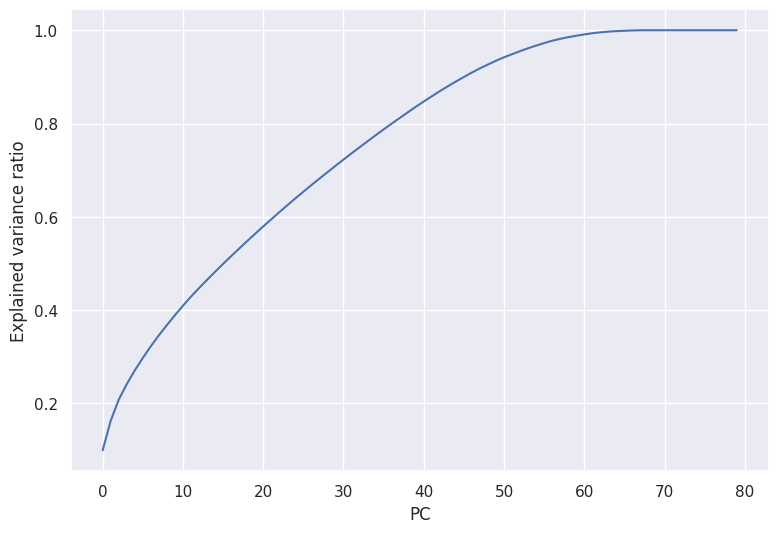

In [586]:
#for i in range(X_fac_num.shape[1])
from sklearn.decomposition import PCA, _pca

pca = PCA(n_components = X_fac_num.shape[1])
dataf_scaler_pca = pca.fit(X_fac_num_scaler)
cum_sum = np.cumsum(pca.explained_variance_ratio_)


plt.figure(figsize = (9, 6))
plt.plot(range(0, len(cum_sum)), cum_sum)
plt.ylabel('Explained variance ratio')
plt.xlabel('PC')
plt.show

In [587]:
iso = IsolationForest(n_estimators = 100, contamination = 0.1)
y_outliers = iso.fit_predict(X_fac_num_scaler)

# scores_pred = iso.decision_function(X)
# scores_pred

y_outliers[y_outliers == 1] = 0
y_outliers[y_outliers == -1] = 1

df['IsolationForest'] = y_outliers

In [588]:
svm = OneClassSVM(kernel = 'rbf', gamma = 'scale', nu = 0.5)
svm.fit(X_fac_num_scaler)

pred = svm.predict(X_fac_num_scaler)

pred[pred == 1] = 0
pred[pred == -1] = 1

df['OneClassSVM'] = pred

In [589]:
lof = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

y_pred = lof.fit_predict(X_fac_num_scaler)

y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

df['LOF'] = y_pred

In [590]:
copd = COPOD(contamination = 0.1)

copd.fit(X_fac_num_scaler)
#scores_pred = copd.decision_function(X)
y_pred_out = copd.predict(X_fac_num_scaler)

df['COPOD'] = y_pred_out

In [593]:
pca = PCA(contamination = 0.1, 
          copy = True, 
          iterated_power = 'auto', 
          n_components = None,
          n_selected_components = None, 
          standardization = True, 
          svd_solver = 'auto', 
          tol = 0.0, 
          weighted = True,
          whiten = False)

pca.fit(X_fac_num_scaler)
#scores_pred = pca.decision_function(X)
y_pred_out = pca.predict(X_fac_num_scaler)

df['PCA'] = y_pred_out

In [594]:
def finding_outlier(data, cat_col, price_col, method = 'iqr', multiplier = 1.5, log = True):
    '''
    data: DataFrame с данными.
    cat_col (str): Столбец с категориальным фактором, например, район города.
    price_col (str): Название столбца с ценами (руб. или кв.м/руб.).
    method (str, optional): Метод определения выбросов ('iqr' или 'zmod'). По умолчанию 'iqr'.
    multiplier (float, optional): Множитель для IQR или Z-оценки. По умолчанию 1.5 для IQR, для Z-оценки рассматривают порог 3.5.
                                  1.5 = 3 СКО, 1.75 * IQR = Zmod.
    log (bool, optional): Отвечает за логорифмирование цены (True), False - нет. По умолчанию 'True'.
    '''
    df_clean = data.copy()
    
    index_out = []

    for cat in df_clean[cat_col].unique():
        cat_data = df_clean[df_clean[cat_col] == cat]
        
        if log == True:
            cat_data[f'{price_col}_ln'] = np.log(cat_data[price_col])
            prices = cat_data[f'{price_col}_ln']
        else:
            prices = cat_data[price_col]

        if method == 'iqr':
            # Метод межквартильного размаха (IQR)
            Q1 = prices.quantile(0.25)
            Q3 = prices.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR
            
            # Индексы выбросов
            indexs = list(cat_data[(prices < lower_bound) | (prices > upper_bound)].index)
    
            if indexs != []:
                index_out.extend(indexs)

        elif method == 'zmod':
            # MAD
            MAD = np.abs(prices - prices.median()).median()
            # Метод измененной Z-оценки
            z_mod = np.abs((0.6745 * (prices - prices.median())) / (MAD + 1e-5))
            # Индексы выбросов
            indexs = list(cat_data[z_mod > multiplier].index)

        
        if indexs != []:
            index_out.extend(indexs)
        
    #np.array(sorted(index_out))
    outlier = np.zeros(len(df_clean), dtype = int)
    outlier[index_out] = 1

    return outlier

In [596]:
arr_out_iqr = finding_outlier(
                              data = df,
                              cat_col = 'geo_city_district_1',
                              price_col = 'bargainterms_price_LN', #LN(Цена) 'LN(Цена(кв.м.))'
                              method = 'iqr',
                              multiplier = 1.7, 
                              log = False
                             )

print(len(arr_out_iqr))
print(arr_out_iqr.sum())

68537
788


In [595]:
df.columns

Index(['cian_id', 'photo', 'url', 'bargainterms_price',
       'bargainterms_price_LN', 'area_total', 'area_total_1', 'unit_price',
       'unit_price_LN', 'rooms_count', 'rooms_count_1', 'floor_1', 'floor',
       'floors_count', 'wall_type', 'last_edited', 'repair_type', 'lat', 'lng',
       'lat_lng', 'geo_region', 'geo_settlement_1', 'geo_city_okrug_1',
       'geo_city_district_1', 'geo_street', 'geo_house_num',
       'distance_to_centre', 'distance_to_centre_1', 'rings_MSK', 'rings_MKAD',
       'subway_name', 'subway_travel_type', 'subway_time_1', 'subway_time',
       'nearest_metro', 'distance_to_nearest_metro', 'description', 'ptn_dadd',
       'Регион_enc', 'med_price', 'Районы_Kmeans', 'type', 'address_elit',
       'bti_year_built', 'is_elit', 'address_full', 'is_renovation',
       'address_renovation', 'Объем_рынка', 'Районы_Kmeans_str',
       'IsolationForest', 'OneClassSVM', 'LOF', 'COPOD', 'PCA'],
      dtype='object')

In [597]:
arr_out_iqr_kv = finding_outlier(
                                 data = df,
                                 cat_col = 'geo_city_district_1',
                                 price_col = 'unit_price_LN', #LN(Цена) 'LN(Цена(кв.м.))'
                                 method = 'iqr',
                                 multiplier = 1.7, 
                                 log = False
                                )

print(len(arr_out_iqr_kv))
print(arr_out_iqr_kv.sum())

68537
917


In [598]:
df['out_iqr'] = arr_out_iqr
df['out_iqr_kv'] = arr_out_iqr_kv

In [599]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from keras import callbacks
from sklearn.metrics import roc_auc_score

In [600]:
X_train, X_test = train_test_split(X_fac_num_scaler, test_size = 0.2, random_state = 42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (54829, 80)
Shape of X_test: (13708, 80)


In [602]:
input_dim = X_train.shape[1]

input_layer = Input(shape = (input_dim, ))

# Encoder
encoded = Dense(64, activation = 'relu')(input_layer)
encoded = Dense(32, activation = 'relu')(encoded)
#encoded = Dropout(0.2)(encoded)
encoded = Dense(16, activation = 'relu')(encoded)  #bottleneck

# Decoder
decoded = Dense(32, activation = 'relu')(encoded)
decoded = Dense(64, activation = 'relu')(decoded)
decoded = Dense(input_dim, activation = 'linear')(decoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer = 'adam', loss = 'mse')

early_stopping = callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True) 

# Обучение модели
history =  autoencoder.fit(
                           X_train, 
                           X_train, 
                           epochs = 150, 
                           batch_size = 128, 
                           shuffle = True, 
                           validation_data = (X_test, X_test), 
                           verbose = 2,
                           callbacks = [early_stopping]
                          )

Epoch 1/150
429/429 - 3s - loss: 0.5974 - val_loss: 0.4073 - 3s/epoch - 7ms/step
Epoch 2/150
429/429 - 2s - loss: 0.3401 - val_loss: 0.2934 - 2s/epoch - 4ms/step
Epoch 3/150
429/429 - 2s - loss: 0.2695 - val_loss: 0.2536 - 2s/epoch - 4ms/step
Epoch 4/150
429/429 - 2s - loss: 0.2406 - val_loss: 0.2312 - 2s/epoch - 4ms/step
Epoch 5/150
429/429 - 2s - loss: 0.2241 - val_loss: 0.2207 - 2s/epoch - 4ms/step
Epoch 6/150
429/429 - 2s - loss: 0.2122 - val_loss: 0.2075 - 2s/epoch - 4ms/step
Epoch 7/150
429/429 - 2s - loss: 0.2030 - val_loss: 0.1990 - 2s/epoch - 4ms/step
Epoch 8/150
429/429 - 2s - loss: 0.1959 - val_loss: 0.1938 - 2s/epoch - 5ms/step
Epoch 9/150
429/429 - 2s - loss: 0.1900 - val_loss: 0.1883 - 2s/epoch - 4ms/step
Epoch 10/150
429/429 - 2s - loss: 0.1848 - val_loss: 0.1834 - 2s/epoch - 5ms/step
Epoch 11/150
429/429 - 2s - loss: 0.1799 - val_loss: 0.1779 - 2s/epoch - 5ms/step
Epoch 12/150
429/429 - 2s - loss: 0.1749 - val_loss: 0.1726 - 2s/epoch - 5ms/step
Epoch 13/150
429/429 - 2s

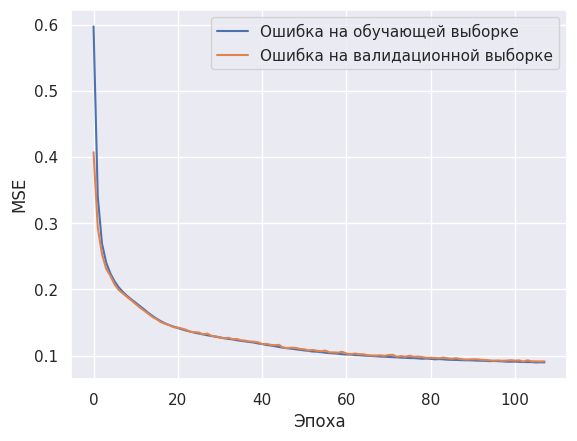

In [603]:
#Построение графика обучения
plt.plot(history.history['loss'], label = 'Ошибка на обучающей выборке')
plt.plot(history.history['val_loss'], label = 'Ошибка на валидационной выборке')
plt.xlabel('Эпоха')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [604]:
# Предсказание и расчет ошибки реконструкции
X_train_reconstructed = autoencoder.predict(X_train)
X_test_reconstructed = autoencoder.predict(X_test)
train_mse = np.mean(np.sum((X_train - X_train_reconstructed)**2, axis = 1))
test_mse = np.mean(np.sum((X_test - X_test_reconstructed)**2, axis = 1))

print(f"Среднеквадратическая ошибка на обучающей выборке: {train_mse}")
print(f"Среднеквадратическая ошибка на тестовой выборке: {test_mse}")

# Определение выбросов (настройте порог)
threshold = test_mse * 1.9 #Пример, подберите оптимальный порог

X_all_reconstructed = autoencoder.predict(X_fac_num_scaler)

all_errors = np.sum((X_fac_num_scaler - X_all_reconstructed)**2, axis = 1)
outliers = np.where(all_errors > threshold)[0]
#print(f"Индексы выбросов: {outliers}")

Среднеквадратическая ошибка на обучающей выборке: 7.1496405593499945
Среднеквадратическая ошибка на тестовой выборке: 7.281182703537147


In [605]:
len(outliers)

7935

In [606]:
outliers_autoencoders = np.zeros(len(df))
outliers_autoencoders[outliers] = 1

print(outliers_autoencoders.sum())
outliers_autoencoders

7935.0


array([1., 0., 0., ..., 0., 0., 0.])

In [607]:
df['Manual_autoencoder'] = outliers_autoencoders.astype(int)

In [608]:
df['sum_out_ml'] = df[['IsolationForest', 'OneClassSVM', 'LOF', 'COPOD', 'PCA', 'Manual_autoencoder']].sum(axis = 1) #'OneClassSVM',
df['sum_out_iqr'] = df[['out_iqr', 'out_iqr_kv']].sum(axis = 1)

In [609]:
df

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit,bti_year_built,is_elit,address_full,is_renovation,address_renovation,Объем_рынка,Районы_Kmeans_str,IsolationForest,OneClassSVM,LOF,COPOD,PCA,out_iqr,out_iqr_kv,Manual_autoencoder,sum_out_ml,sum_out_iqr
0,238345845,https://images.cdn-cian.ru/images/78/391/501/k...,https://www.cian.ru/sale/flat/238345845,13140000,16.391172,65.7,от_65_до_85,199999.0,12.206068,2-комн.,3-к,последний,8,8,Монолитный,2024-10-04 00:00:00,no,55.81953,37.24588,55.81953 37.24588,Московская область,Красногорск,МО_З,Красногорск,улица Пришвина,15,24.614772,от_19_до_30_км,За_МКАД,За_МКАД,Опалиха,walk,до_6_минут,6.0,D2_Опалиха,0.416612,Вашему вниманию предлагается 2-х комнатная ква...,2024-10-16 00:00:00,1,208979.0,4,нет,нет,2020,нет,"Московская область, Красногорск, улица Пришвин...",нет,нет,10900,4,0,1,0,0,0,0,0,1,2,0
1,239198805,https://images.cdn-cian.ru/images/3/648/639/93...,https://www.cian.ru/sale/flat/239198805,7550000,15.837058,50.0,от_42_до_65,151000.0,11.925035,2-комн.,2-к,первый,1,2,Кирпичный,2024-09-28 00:00:00,cosmetic,55.63384,37.84267,55.63384 37.84267,Московская область,Дзержинский,МО_ЮВ,Дзержинский,улица Строителей,10,19.198938,от_19_до_30_км,За_МКАД,За_МКАД,Котельники,transport,нет_пешей_доступности,10.0,Таганско_Краснопресненская_Котельники,4.589888,"Квартира для тех, кто ценит тишину и спокойст...",2024-10-16 00:00:00,1,159635.0,2,нет,нет,1956,нет,"Московская область, Дзержинский, улица Строите...",нет,нет,25994,2,0,1,0,0,0,0,0,0,1,0
2,240154473,https://images.cdn-cian.ru/images/1/673/449/kv...,https://www.cian.ru/sale/flat/240154473,6100000,15.623799,42.2,от_42_до_65,144549.0,11.881374,1-комн.,2-к,этажи_2-5,4,17,Панельный,2024-10-03 00:00:00,euro,55.83250,37.97867,55.8325 37.97867,Московская область,Балашиха-2,МО_В,Балашиха-2,улица 40 лет Победы,29,23.995573,от_19_до_30_км,За_МКАД,За_МКАД,Щёлковская,transport,нет_пешей_доступности,16.0,D5_Балашиха_Балашиха,3.110049,Ян. Квартира в хорошем состоянии! Один взрослы...,2024-10-16 00:00:00,1,152876.0,2,нет,нет,2008,нет,"Московская область, Балашиха-2, улица 40 лет П...",нет,нет,25994,2,0,0,0,0,0,0,0,0,0,0
3,239293843,https://images.cdn-cian.ru/images/2071196285-1...,https://www.cian.ru/sale/flat/239293843,75000000,18.132999,130.0,более_105,576923.0,13.265464,3-комн.,4+,этажи_24-33,27,34,Монолитный,2024-09-25 00:00:00,design,55.76035,37.41940,55.76035 37.4194,Москва,Москва,ЗАО,ЗАО_Крылатское,улица Крылатские Холмы,37,12.673599,от_8_до_14_км,МКАД,внутри_МКАД,Крылатское,walk,от_6_до_12_минут,11.0,Арбатско_Покровская_Крылатское,0.805016,Лот 57704 Вашему вниманию предлагается 3-комна...,2024-10-16 00:00:00,0,376190.0,12,нет,нет,2006,нет,"Москва, улица Крылатские Холмы, 37",нет,нет,6517,12,0,1,0,1,0,0,0,0,2,0
4,239383173,https://images.cdn-cian.ru/images/5/153/839/kv...,https://www.cian.ru/sale/flat/239383173,264200000,19.392217,330.0,более_105,800606.0,13.593124,4+-комн.,4+,этажи_2-5,2,12,Монолитный,2024-09-30 00:00:00,design,55.83210,37.48396,55.8321 37.48396,Москва,Москва,САО,САО_Войковский,Ленинградское шоссе,37к1,12.275179,от_8_до_14_км,МКАД,внутри_МКАД,Войковская,transport,нет_пешей_доступности,3.0,Замоскворецкая_Водный_стадион,0.873577,"ЖК ""Город Яхт"" 2007 года постройки. Охраняемая...",2024-10-16 00:00:00,0,357142.0,10,нет,нет,2007,нет,"Москва, Ленинградское шоссе, 37к1",нет,нет,6517,10,1,1,1,0,0,1,1,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [610]:
#df.to_csv('Выборка_МиМО_out_second.csv')

In [630]:
df = pd.read_csv('Выборка_МиМО_out_second.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit,bti_year_built,is_elit,address_full,is_renovation,address_renovation,Объем_рынка,Районы_Kmeans_str,IsolationForest,OneClassSVM,LOF,COPOD,PCA,out_iqr,out_iqr_kv,Manual_autoencoder,sum_out_ml,sum_out_iqr
0,238345845,https://images.cdn-cian.ru/images/78/391/501/k...,https://www.cian.ru/sale/flat/238345845,13140000,16.391172,65.7,от_65_до_85,199999.0,12.206068,2-комн.,3-к,последний,8,8,Монолитный,2024-10-04 00:00:00,no,55.81953,37.24588,55.81953 37.24588,Московская область,Красногорск,МО_З,Красногорск,улица Пришвина,15,24.614772,от_19_до_30_км,За_МКАД,За_МКАД,Опалиха,walk,до_6_минут,6.0,D2_Опалиха,0.416612,Вашему вниманию предлагается 2-х комнатная ква...,2024-10-16 00:00:00,1,208979.0,4,нет,нет,2020,нет,"Московская область, Красногорск, улица Пришвин...",нет,нет,10900,4,0,1,0,0,0,0,0,1,2,0
1,239198805,https://images.cdn-cian.ru/images/3/648/639/93...,https://www.cian.ru/sale/flat/239198805,7550000,15.837058,50.0,от_42_до_65,151000.0,11.925035,2-комн.,2-к,первый,1,2,Кирпичный,2024-09-28 00:00:00,cosmetic,55.63384,37.84267,55.63384 37.84267,Московская область,Дзержинский,МО_ЮВ,Дзержинский,улица Строителей,10,19.198938,от_19_до_30_км,За_МКАД,За_МКАД,Котельники,transport,нет_пешей_доступности,10.0,Таганско_Краснопресненская_Котельники,4.589888,"Квартира для тех, кто ценит тишину и спокойст...",2024-10-16 00:00:00,1,159635.0,2,нет,нет,1956,нет,"Московская область, Дзержинский, улица Строите...",нет,нет,25994,2,0,1,0,0,0,0,0,0,1,0
2,240154473,https://images.cdn-cian.ru/images/1/673/449/kv...,https://www.cian.ru/sale/flat/240154473,6100000,15.623799,42.2,от_42_до_65,144549.0,11.881374,1-комн.,2-к,этажи_2-5,4,17,Панельный,2024-10-03 00:00:00,euro,55.83250,37.97867,55.8325 37.97867,Московская область,Балашиха-2,МО_В,Балашиха-2,улица 40 лет Победы,29,23.995573,от_19_до_30_км,За_МКАД,За_МКАД,Щёлковская,transport,нет_пешей_доступности,16.0,D5_Балашиха_Балашиха,3.110049,Ян. Квартира в хорошем состоянии! Один взрослы...,2024-10-16 00:00:00,1,152876.0,2,нет,нет,2008,нет,"Московская область, Балашиха-2, улица 40 лет П...",нет,нет,25994,2,0,0,0,0,0,0,0,0,0,0
3,239293843,https://images.cdn-cian.ru/images/2071196285-1...,https://www.cian.ru/sale/flat/239293843,75000000,18.132999,130.0,более_105,576923.0,13.265464,3-комн.,4+,этажи_24-33,27,34,Монолитный,2024-09-25 00:00:00,design,55.76035,37.41940,55.76035 37.4194,Москва,Москва,ЗАО,ЗАО_Крылатское,улица Крылатские Холмы,37,12.673599,от_8_до_14_км,МКАД,внутри_МКАД,Крылатское,walk,от_6_до_12_минут,11.0,Арбатско_Покровская_Крылатское,0.805016,Лот 57704 Вашему вниманию предлагается 3-комна...,2024-10-16 00:00:00,0,376190.0,12,нет,нет,2006,нет,"Москва, улица Крылатские Холмы, 37",нет,нет,6517,12,0,1,0,1,0,0,0,0,2,0
4,239383173,https://images.cdn-cian.ru/images/5/153/839/kv...,https://www.cian.ru/sale/flat/239383173,264200000,19.392217,330.0,более_105,800606.0,13.593124,4+-комн.,4+,этажи_2-5,2,12,Монолитный,2024-09-30 00:00:00,design,55.83210,37.48396,55.8321 37.48396,Москва,Москва,САО,САО_Войковский,Ленинградское шоссе,37к1,12.275179,от_8_до_14_км,МКАД,внутри_МКАД,Войковская,transport,нет_пешей_доступности,3.0,Замоскворецкая_Водный_стадион,0.873577,"ЖК ""Город Яхт"" 2007 года постройки. Охраняемая...",2024-10-16 00:00:00,0,357142.0,10,нет,нет,2007,нет,"Москва, Ленинградское шоссе, 37к1",нет,нет,6517,10,1,1,1,0,0,1,1,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [631]:
df['sum_out_ml'].value_counts()

0    29705
1    22717
2     8286
4     3144
3     2999
5     1362
6      324
Name: sum_out_ml, dtype: int64

In [632]:
df['sum_out_iqr'].value_counts()

0    67049
1     1271
2      217
Name: sum_out_iqr, dtype: int64

In [615]:
iqr_ = df[df['sum_out_iqr'] >= 1]
iqr_['geo_city_district_1'].value_counts()
#iqr_[iqr_['Районы_2'] == 'ЦАО_Басманный']['Кольца'].value_counts()
#df[df['geo_city_district_1'] == 'ЦАО_Таганский']['is_elit'].value_counts()

ЦАО_Таганский            66
ЗАО_Раменки              41
Химки                    36
ЗАО_Дорогомилово         32
ВАО_Гольяново            31
                         ..
САО_Западное_Дегунино     1
Архангельское             1
Восточное_Бутово_ЖК       1
ВАО_Метрогородок          1
ЮВАО_Лефортово            1
Name: geo_city_district_1, Length: 165, dtype: int64

[0.09945017 0.06339999]


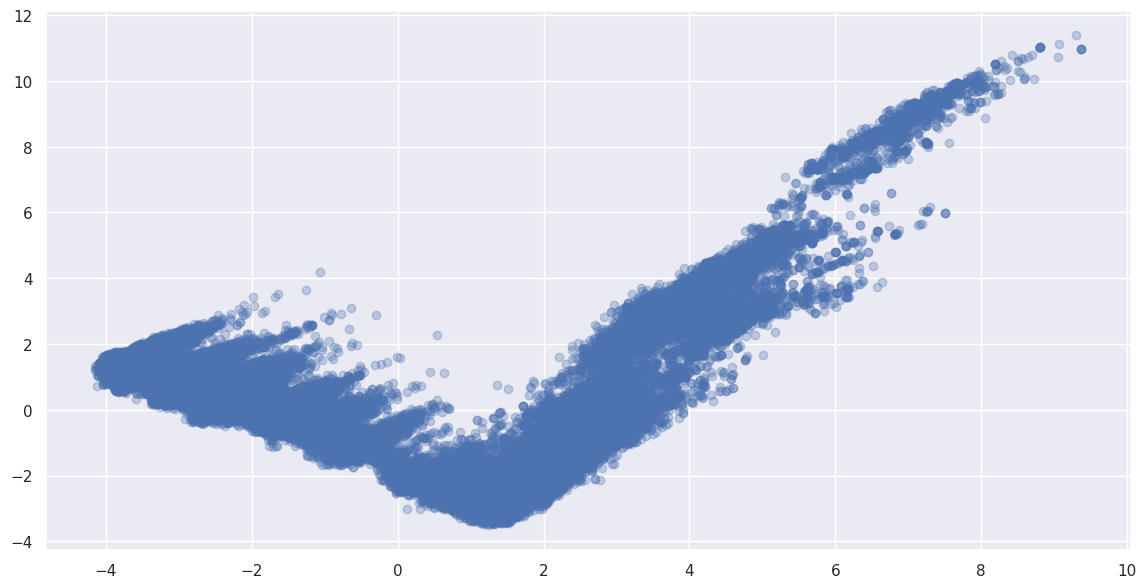

In [616]:
from sklearn.decomposition import PCA, _pca

pca = PCA(n_components = 2)

PC = pca.fit_transform(X_fac_num_scaler)

print(pca.explained_variance_ratio_)

plt.figure(figsize = (14, 7))

plt.scatter(
            x = PC[:, 0], 
            y = PC[:, 1],
            #color = 
            alpha = 0.3
           )

plt.show()

In [633]:
df_model = df[df['sum_out_ml'] < 5]
df_model = df_model[df_model['sum_out_iqr'] == 0]
df_model.reset_index(drop = True , inplace = True )
df_model

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lng,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit,bti_year_built,is_elit,address_full,is_renovation,address_renovation,Объем_рынка,Районы_Kmeans_str,IsolationForest,OneClassSVM,LOF,COPOD,PCA,out_iqr,out_iqr_kv,Manual_autoencoder,sum_out_ml,sum_out_iqr
0,238345845,https://images.cdn-cian.ru/images/78/391/501/k...,https://www.cian.ru/sale/flat/238345845,13140000,16.391172,65.7,от_65_до_85,199999.0,12.206068,2-комн.,3-к,последний,8,8,Монолитный,2024-10-04 00:00:00,no,55.81953,37.24588,55.81953 37.24588,Московская область,Красногорск,МО_З,Красногорск,улица Пришвина,15,24.614772,от_19_до_30_км,За_МКАД,За_МКАД,Опалиха,walk,до_6_минут,6.0,D2_Опалиха,0.416612,Вашему вниманию предлагается 2-х комнатная ква...,2024-10-16 00:00:00,1,208979.0,4,нет,нет,2020,нет,"Московская область, Красногорск, улица Пришвин...",нет,нет,10900,4,0,1,0,0,0,0,0,1,2,0
1,239198805,https://images.cdn-cian.ru/images/3/648/639/93...,https://www.cian.ru/sale/flat/239198805,7550000,15.837058,50.0,от_42_до_65,151000.0,11.925035,2-комн.,2-к,первый,1,2,Кирпичный,2024-09-28 00:00:00,cosmetic,55.63384,37.84267,55.63384 37.84267,Московская область,Дзержинский,МО_ЮВ,Дзержинский,улица Строителей,10,19.198938,от_19_до_30_км,За_МКАД,За_МКАД,Котельники,transport,нет_пешей_доступности,10.0,Таганско_Краснопресненская_Котельники,4.589888,"Квартира для тех, кто ценит тишину и спокойст...",2024-10-16 00:00:00,1,159635.0,2,нет,нет,1956,нет,"Московская область, Дзержинский, улица Строите...",нет,нет,25994,2,0,1,0,0,0,0,0,0,1,0
2,240154473,https://images.cdn-cian.ru/images/1/673/449/kv...,https://www.cian.ru/sale/flat/240154473,6100000,15.623799,42.2,от_42_до_65,144549.0,11.881374,1-комн.,2-к,этажи_2-5,4,17,Панельный,2024-10-03 00:00:00,euro,55.83250,37.97867,55.8325 37.97867,Московская область,Балашиха-2,МО_В,Балашиха-2,улица 40 лет Победы,29,23.995573,от_19_до_30_км,За_МКАД,За_МКАД,Щёлковская,transport,нет_пешей_доступности,16.0,D5_Балашиха_Балашиха,3.110049,Ян. Квартира в хорошем состоянии! Один взрослы...,2024-10-16 00:00:00,1,152876.0,2,нет,нет,2008,нет,"Московская область, Балашиха-2, улица 40 лет П...",нет,нет,25994,2,0,0,0,0,0,0,0,0,0,0
3,239293843,https://images.cdn-cian.ru/images/2071196285-1...,https://www.cian.ru/sale/flat/239293843,75000000,18.132999,130.0,более_105,576923.0,13.265464,3-комн.,4+,этажи_24-33,27,34,Монолитный,2024-09-25 00:00:00,design,55.76035,37.41940,55.76035 37.4194,Москва,Москва,ЗАО,ЗАО_Крылатское,улица Крылатские Холмы,37,12.673599,от_8_до_14_км,МКАД,внутри_МКАД,Крылатское,walk,от_6_до_12_минут,11.0,Арбатско_Покровская_Крылатское,0.805016,Лот 57704 Вашему вниманию предлагается 3-комна...,2024-10-16 00:00:00,0,376190.0,12,нет,нет,2006,нет,"Москва, улица Крылатские Холмы, 37",нет,нет,6517,12,0,1,0,1,0,0,0,0,2,0
4,239678768,https://images.cdn-cian.ru/images/7/757/049/kv...,https://www.cian.ru/sale/flat/239678768,9700000,16.087636,31.4,от_28_до_42,308917.0,12.640828,1-комн.,1-к,последний,9,9,Панельный,2024-10-14 00:00:00,cosmetic,55.83099,37.58890,55.83099 37.5889,Москва,Москва,СВАО,СВАО_Марфино,улица Академика Комарова,14А,8.871644,от_8_до_14_км,ЧТК,внутри_МКАД,Фонвизинская,walk,от_12_до_17_минут,14.0,Люблинско_Дмитровская_Фонвизинская,0.828432,Продается светлая и теплая однокомнатная кварт...,2024-10-16 00:00:00,0,367894.0,12,нет,нет,1964,нет,"Москва, улица Академика Комарова, 14А",нет,нет,18230,12,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

<AxesSubplot:>

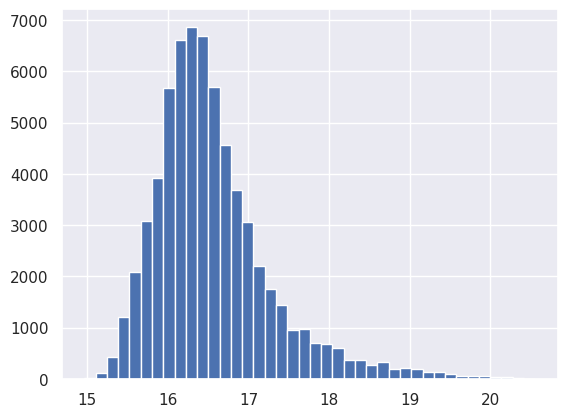

In [618]:
df_model['bargainterms_price_LN'].hist(bins = 40)

# Catboost model

In [1]:
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from math import sqrt

from catboost import CatBoostRegressor
from catboost import Pool, cv

In [5]:
df = pd.read_csv('Выборка_МиМО_out_second.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head(5)

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lon,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit,bti_year_built,is_elit,address_full,is_renovation,address_renovation,Объем_рынка,Районы_Kmeans_str,IsolationForest,OneClassSVM,LOF,COPOD,PCA,out_iqr,out_iqr_kv,Manual_autoencoder,sum_out_ml,sum_out_iqr,nn_index,dist,OA_add,lat_OA,lon_OA,metrs,sim,is_elit_2,Сцепка_к_ОА,type_2
0,238345845,https://images.cdn-cian.ru/images/78/391/501/k...,https://www.cian.ru/sale/flat/238345845,13140000,16.391172,65.7,от_65_до_85,199999.0,12.206068,2-комн.,3-к,последний,8,8,Монолитный,2024-10-04 00:00:00,no,55.81953,37.24588,55.81953 37.24588,Московская область,Красногорск,МО_З,Красногорск,улица Пришвина,15,24.614772,от_19_до_30_км,За_МКАД,За_МКАД,Опалиха,walk,до_6_минут,6.0,D2_Опалиха,0.416612,Вашему вниманию предлагается 2-х комнатная ква...,2024-10-16 00:00:00,1,208979.0,4,нет,нет,2020,нет,"Московская область, Красногорск, улица Пришвин...",нет,нет,10900,4,0,1,0,0,0,0,0,1,2,0,20,0.118282,"Московская область, Красногорск, улица Согласи...",55.815074,37.378701,8313.0,86,no,55.815074 37.378701,нет
1,239198805,https://images.cdn-cian.ru/images/3/648/639/93...,https://www.cian.ru/sale/flat/239198805,7550000,15.837058,50.0,от_42_до_65,151000.0,11.925035,2-комн.,2-к,первый,1,2,Кирпичный,2024-09-28 00:00:00,cosmetic,55.63384,37.84267,55.63384 37.84267,Московская область,Дзержинский,МО_ЮВ,Дзержинский,улица Строителей,10,19.198938,от_19_до_30_км,За_МКАД,За_МКАД,Котельники,transport,нет_пешей_доступности,10.0,Таганско_Краснопресненская_Котельники,4.589888,"Квартира для тех, кто ценит тишину и спокойст...",2024-10-16 00:00:00,1,159635.0,2,нет,нет,1956,нет,"Московская область, Дзержинский, улица Строите...",нет,нет,25994,2,0,1,0,0,0,0,0,0,1,0,55,0.318524,"Москва, Казарменный переулок, 3",55.757273,37.649741,18291.0,43,no,55.757273 37.649741,нет
2,240154473,https://images.cdn-cian.ru/images/1/673/449/kv...,https://www.cian.ru/sale/flat/240154473,6100000,15.623799,42.2,от_42_до_65,144549.0,11.881374,1-комн.,2-к,этажи_2-5,4,17,Панельный,2024-10-03 00:00:00,euro,55.83250,37.97867,55.8325 37.97867,Московская область,Балашиха-2,МО_В,Балашиха-2,улица 40 лет Победы,29,23.995573,от_19_до_30_км,За_МКАД,За_МКАД,Щёлковская,transport,нет_пешей_доступности,16.0,D5_Балашиха_Балашиха,3.110049,Ян. Квартира в хорошем состоянии! Один взрослы...,2024-10-16 00:00:00,1,152876.0,2,нет,нет,2008,нет,"Московская область, Балашиха-2, улица 40 лет П...",нет,нет,25994,2,0,0,0,0,0,0,0,0,0,0,55,0.373444,"Москва, Казарменный переулок, 3",55.757273,37.649741,22197.0,40,no,55.757273 37.649741,нет
3,239293843,https://images.cdn-cian.ru/images/2071196285-1...,https://www.cian.ru/sale/flat/239293843,75000000,18.132999,130.0,более_105,576923.0,13.265464,3-комн.,4+,этажи_24-33,27,34,Монолитный,2024-09-25 00:00:00,design,55.76035,37.41940,55.76035 37.4194,Москва,Москва,ЗАО,ЗАО_Крылатское,улица Крылатские Холмы,37,12.673599,от_8_до_14_км,МКАД,внутри_МКАД,Крылатское,walk,от_6_до_12_минут,11.0,Арбатско_Покровская_Крылатское,0.805016,Лот 57704 Вашему вниманию предлагается 3-комна...,2024-10-16 00:00:00,0,376190.0,12,нет,нет,2006,нет,"Москва, улица Крылатские Холмы, 37",нет,нет,6517,12,0,1,0,1,0,0,0,0,2,0,27,0.095259,"Московская область, Одинцовский городской окр...",55.696898,37.400936,7150.0,35,no,55.696898 37.400936,нет
4,239383173,https://images.cdn-cian.ru/images/5/153/839/kv...,https://www.cian.ru/sale/flat/239383173,264200000,19.392217,330.0,более_105,800606.0,13.593124,4+-комн.,4+,этажи_2-5,2,12,Монолитный,2024-09-30 00:00:00,design,55.83210,37.48396,55.8321 37.48396,М

<AxesSubplot:>

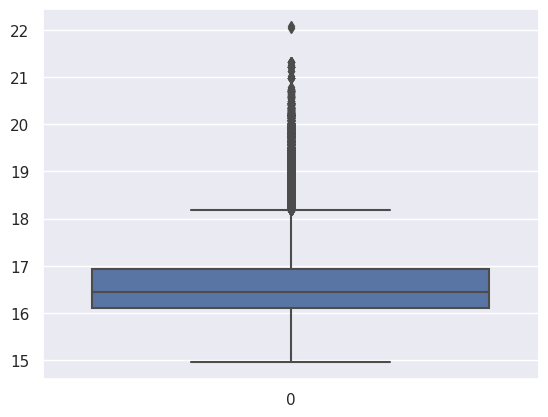

In [14]:
sns.boxplot(df['bargainterms_price_LN'])

In [17]:
df[df['bargainterms_price_LN'] > 20]

,cian_id,photo,url,bargainterms_price,bargainterms_price_LN,area_total,area_total_1,unit_price,unit_price_LN,rooms_count,rooms_count_1,floor_1,floor,floors_count,wall_type,last_edited,repair_type,lat,lon,lat_lng,geo_region,geo_settlement_1,geo_city_okrug_1,geo_city_district_1,geo_street,geo_house_num,distance_to_centre,distance_to_centre_1,rings_MSK,rings_MKAD,subway_name,subway_travel_type,subway_time_1,subway_time,nearest_metro,distance_to_nearest_metro,description,ptn_dadd,Регион_enc,med_price,Районы_Kmeans,type,address_elit,bti_year_built,is_elit,address_full,is_renovation,address_renovation,Объем_рынка,Районы_Kmeans_str,IsolationForest,OneClassSVM,LOF,COPOD,PCA,out_iqr,out_iqr_kv,Manual_autoencoder,sum_out_ml,sum_out_iqr,nn_index,dist,OA_add,lat_OA,lon_OA,metrs,sim,is_elit_2,Сцепка_к_ОА,type_2
27,235048570,https://images.cdn-cian.ru/images/2090399464-1...,https://www.cian.ru/sale/flat/235048570,679070000,20.336235,363.0,более_105,1870716.0,14.441832,4+-комн.,4+,этажи_10-15,11,16,Монолитно-кирпичный,2024-10-07 00:00:00,euro,55.74076,37.58105,55.74076 37.58105,Москва,Москва,ЦАО,ЦАО_Хамовники,1-й Неопалимовский переулок,8,2.896508,до_3_км,ТТК,внутри_МКАД,Парк Культуры,walk,неважно,12.0,Кольцевая_Киевская,0.904499,Продажа роскошного видового трехуровневого пен...,2024-10-16 00:00:00,0,1164794.0,20,престижный,"1-й Неопалимовский переулок, 8, Москва",2003,престижный,"Москва, 1-й Неопалимовский переулок, 8",нет,нет,6517,20,1,1,0,1,1,0,0,1,5,0,57,0.003436,"Москва, улица Плющиха, 37",55.741049,37.577427,229.0,41,no,55.741049 37.577427,нет
140,281599615,https://images.cdn-cian.ru/images/2272071086-1...,https://www.cian.ru/sale/flat/281599615,523854000,20.076724,252.3,более_105,2076313.0,14.546104,4+-комн.,4+,этажи_2-5,4,7,Монолитный,2024-10-04 00:00:00,no,55.74216,37.58834,55.74216 37.58834,Москва,Москва,ЦАО,ЦАО_Хамовники,Большой Левшинский переулок,11,2.423270,до_3_км,Садовое_кольцо,внутри_МКАД,Смоленская,walk,неважно,9.0,Сокольническая_Парк_культуры,0.806262,Лот f1395 Вашему вниманию предлагается двухсто...,2024-10-16 00:00:00,0,1164794.0,20,престижный+,"Большой Лёвшинский переулок, 11, Москва",2003,престижный+,"Москва, Большой Левшинский переулок, 11",нет,нет,6517,20,1,1,0,1,1,0,0,0,4,0,57,0.010653,"Москва, улица Плющиха, 37",55.741049,37.577427,694.0,41,no,55.741049 37.577427,нет
155,280950375,https://images.cdn-cian.ru/images/2099480926-1...,https://www.cian.ru/sale/flat/280950375,594865320,20.203846,219.0,более_105,2716280.0,14.814774,3-комн.,4+,этажи_2-5,2,5,Монолитно-кирпичный,2024-10-13 00:00:00,design,55.73658,37.60085,55.73658 37.60085,Москва,Москва,ЦАО,ЦАО_Хамовники,Пречистенская набережная,5,2.271103,до_3_км,Садовое_кольцо,внутри_МКАД,Парк Культуры,walk,неважно,7.0,Сокольническая_Парк_культуры,0.405767,Лот 56325. Наталья Черных.\n\nПредлагается шик...,2024-10-16 00:00:00,0,1164794.0,20,престижный+,"Пречистенская набережная, 5, Москва",2015,престижный+,"Москва, Пречистенская набережная, 5",нет,нет,6517,20,1,1,0,1,1,0,0,0,4,0,50,0.019629,"Москва, Старомонетный переулок, 19/11с1",55.739939,37.619019,1197.0,46,no,55.739939 37.619019,нет
313,278927199,https://images.cdn-cian.ru/images/49/762/931/1...,https://www.cian.ru/sale/flat/278927199,523854000,20.076724,252.0,более_105,2078785.0,14.547294,4+-комн.,4+,этажи_2-5,4,7,Монолитный,2024-10-14 00:00:00,no,55.74216,37.58834,55.74216 37.58834,Москва,Москва,ЦАО,ЦАО_Хамовники,Большой Левшинский переулок,11,2.423270,до_3_км,Садовое_кольцо,внутри_МКАД,Смоленская,walk,неважно,9.0,Сокольническая_Парк_культуры,0.806262,"Лот 60587. ЖК ""Дворянское гнездо"" - Предлагает...",2024-10-16 00:00:00,0,1164794.0,20,престижный+,"Большой Лёвшинский переулок, 11, Москва",2003,престижный+,"Москва, Большой Левшинский переулок, 11",нет,нет,6517,20,1,1,0,1,1,0,0,0,4,0,57,0.010653,"Москва, улица Плющиха, 37",55.741049,37.577427,694.0,41,no,55.741049 37.577427,нет
317,278927103,https://images.cdn-cian.ru/images/76/762/931/1...,https://www.cian.ru/sale/flat/278927103,970100000,20.692910,366.0,более_105,

In [18]:
# df_model = df[df['sum_out_ml'] < 5]
# df_model = df_model[df_model['sum_out_iqr'] == 0]
# df_model.reset_index(drop = True , inplace = True )
# df_model

df_model = df[df['bargainterms_price_LN'] < 21]
df_model.reset_index(drop = True , inplace = True )

In [19]:
X = df_model[[
        #'bargainterms_price_LN', 
        'area_total',
        #'floor', 
        'floor_1', 
        'floors_count',
        'is_elit', 
        'geo_region',
        'geo_city_district_1', 
        #'Районы_Kmeans',
        #'Районы_Kmeans_str', 
        'rings_MSK', 
        'geo_city_okrug_1', 
        #'distance_to_nearest_metro',
        'subway_time_1', 
        #'distance_to_centre', 
        'distance_to_centre_1', 
        'rings_MKAD', 
        'repair_type',
        #'is_renovation',
        'bti_year_built',
        'Объем_рынка'
      ]]

Y = df_model['bargainterms_price_LN']



def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68517 entries, 0 to 68516
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area_total            68517 non-null  float64
 1   floor_1               68517 non-null  object 
 2   floors_count          68517 non-null  int64  
 3   is_elit               68517 non-null  object 
 4   geo_region            68517 non-null  object 
 5   geo_city_district_1   68517 non-null  object 
 6   rings_MSK             68517 non-null  object 
 7   geo_city_okrug_1      68517 non-null  object 
 8   subway_time_1         68517 non-null  object 
 9   distance_to_centre_1  68517 non-null  object 
 10  rings_MKAD            68517 non-null  object 
 11  repair_type           68517 non-null  object 
 12  bti_year_built        68517 non-null  int64  
 13  Объем_рынка           68517 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 7.3+ MB


In [637]:
len(X.geo_city_district_1.unique())

182

In [638]:
X.geo_city_district_1.value_counts()

Химки              1724
ЗАО_Раменки        1704
Люберцы            1669
Красногорск        1665
НАО_Коммунарка     1621
                   ... 
Ромашково            57
ЗАО_ИЦ_Сколково      53
Бородино             42
ВАО_Восточный        27
Архангельское        20
Name: geo_city_district_1, Length: 182, dtype: int64

In [27]:
catb = CatBoostRegressor(
         iterations = 20500, #максимальное количество построенных деревьев
         random_seed = 5, 
         learning_rate = 0.01, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
         max_depth = 7, #глубина дерева
         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
         #l2_leaf_reg = 20, #коэффициент при члене регуляризации L2 функции потерь
         #bagging_temperature = 1,
         #random_strength = 1,
         one_hot_max_size = 190, #не используем one hot encoding, а включаем one_hot_max_size
         #loss_function = 'MAE', #по умолчанию
         #eval_metric = 'MAPE', #MAPE
         #od_type = 'Iter', #если модель переобучилась
         #od_wait = 20
         use_best_model = True,
         early_stopping_rounds = 10
        ) #делай остановку через 20 итераций
         #если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
         #если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

shuffle_split = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

#массив для сохранения итоговых оценок
all_rmse = [] 
all_mae = []
all_mape = []
all_r2 = []

for n, (tr_index, te_index) in enumerate(shuffle_split.split(X, Y)):
    print('Обработка процесса №', n)
    
    # Split data and target
    X_train = X.iloc[tr_index]
    Y_train = Y.iloc[tr_index]
    X_test = X.iloc[te_index]
    Y_test = Y.iloc[te_index]


    catb.fit(X_train, Y_train, 
             cat_features = cat_features, #массив с индексами категориальных фичей
             eval_set = (X_test, Y_test),
             verbose = False, 
             #plot = True
            ) #включение графика
 
    pred_test = np.exp(catb.predict(X_test))
    mse_test = mse(np.exp(Y_test), pred_test)
    
    all_rmse.append(round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
    all_mae.append(round(mae(np.exp(Y_test), pred_test), 4))
    all_mape.append(round(mape(np.exp(Y_test), pred_test), 4))
    all_r2.append(r2_score(np.exp(Y_test), pred_test))

Обработка процесса № 0
Обработка процесса № 1
Обработка процесса № 2
Обработка процесса № 3
Обработка процесса № 4
Обработка процесса № 5
Обработка процесса № 6
Обработка процесса № 7
Обработка процесса № 8
Обработка процесса № 9


In [28]:
# массив оценок по k блокам
print('RMSE:', all_rmse)
print('MAE:', all_mae)
print('MAPE:', all_mape)
print('R2:', all_r2)

RMSE: [17943124.7644, 14878221.2348, 20805797.2946, 13780270.524, 16164692.7116, 15873625.1277, 13915942.5, 15451201.7141, 15627370.5164, 14838763.1854]
MAE: [3634800.389, 3543535.7914, 3965988.3456, 3393688.5396, 3685074.375, 3724160.8717, 3431975.5319, 3540172.8547, 3730358.434, 3555563.0786]
MAPE: [0.0927, 0.0913, 0.0924, 0.0912, 0.0914, 0.092, 0.092, 0.0911, 0.0915, 0.0923]
R2: [0.8976143760550253, 0.938605403107318, 0.8931702961474246, 0.941921835349004, 0.9274592570786443, 0.9325600758016466, 0.9410755698998037, 0.9327774068446473, 0.9338217436170047, 0.9311483859764198]


*0.03:
RMSE: [7767797.3132, 8899043.3664, 10607212.5694, 8279542.9938, 9114057.5693, 9253612.5342, 9648305.5225, 9167036.0403, 8873733.3345, 9183798.7131]
MAE: [2434896.9973, 2528440.8434, 2607209.7812, 2486475.4416, 2475148.7942, 2627491.2568, 2563944.7306, 2472380.7382, 2610502.1657, 2513664.3618]
MAPE: [0.0859, 0.0858, 0.0861, 0.0852, 0.086, 0.0877, 0.0852, 0.085, 0.0865, 0.0857]
R2: [0.9594359746955521, 0.9530873231910594, 0.9342862927900528, 0.9592541990420239, 0.9442376498854461, 0.940263673457931, 0.9441586137031822, 0.9425778131284909, 0.9528108911090637, 0.9497760127265572]*

In [29]:
# среднее значение mae
print(f'RMSE_mean: {np.mean(all_rmse)}, std: {np.sqrt(np.array(all_rmse).var())}')
print(f'MAE_mean: {np.mean(all_mae)}, std: {np.sqrt(np.array(all_mae).var())}')
print(f'MAPE_mean: {np.mean(all_mape)}, std: {np.sqrt(np.array(all_mape).var())}')
print(f'R2_mean: {np.mean(all_r2)}, std: {np.sqrt(np.array(all_r2).var())}')

RMSE_mean: 15927900.957300002, std: 1979391.7879755364
MAE_mean: 3620531.8211499997, std: 158154.55945809706
MAPE_mean: 0.09179, std: 0.0005337602458032998
R2_mean: 0.9270154349876938, std: 0.016406336204310774


*0.03:
RMSE_mean: 9079413.99567, std: 717139.8183615959
MAE_mean: 2532015.51108, std: 63714.20759408608
MAPE_mean: 0.08591000000000001, std: 0.0007408778576796573
R2_mean: 0.947988844372936, std: 0.007847580339787587*

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 23)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((54813, 14), (54813,), (13704, 14), (13704,))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 2945456.6711
RMSE на обучении: 11865687.573
MAPE на обучении: 0.0802
R2 на обучении: 0.9615
MAE на тесте: 3462110.5667
RMSE на тесте: 13681633.4771
MAPE на тесте: 0.0918
R2 на тесте: 0.9397
MAE: 3048791.9745
RMSE: 12250447.2751
MAPE: 0.0825
R2: 0.9577


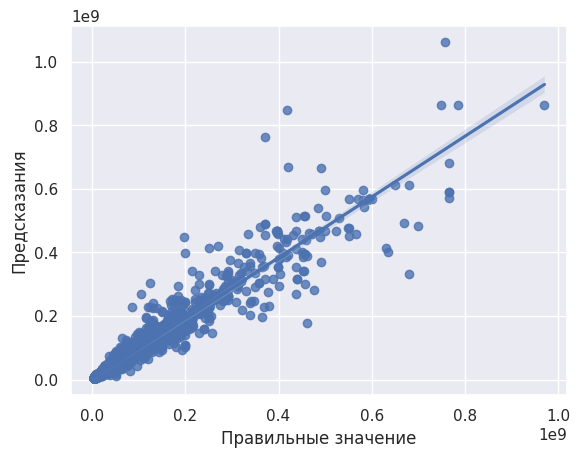

In [22]:
catb = CatBoostRegressor(iterations = 20500, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.01, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 7, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 20, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 190, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         #od_type = 'Iter', #если модель переобучилась
                         #od_wait = 20,
                         use_best_model = True,
                         early_stopping_rounds = 10
                        ) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

catb.fit(X_train, Y_train, 
         cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

pred_1 = np.exp(catb.predict(X))

pred_train = np.exp(catb.predict(X_train))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(catb.predict(X_test))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

print("MAE:", round(mae(np.exp(Y), pred_1), 4))
print("RMSE:", round(sqrt(mse(np.exp(Y), pred_1)), 4))
print("MAPE:", round(mape(np.exp(Y), pred_1), 4))
print("R2:", round(r2_score(np.exp(Y), pred_1), 4))

sns.regplot(x = np.exp(Y_test), y = pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

Метрики с learning_rate = 0.03:
MAE на обучении: 2179371.9413
RMSE на обучении: 7692016.8657
MAPE на обучении: 0.0781
R2 на обучении: 0.9613
===============================
MAE на тесте: 2664042.8766
RMSE на тесте: 9079466.3414
MAPE на тесте: 0.0882
R2 на тесте: 0.9517
===============================
MAE: 2276310.5663
RMSE: 7988820.5417
MAPE: 0.0801
R2: 0.9592


In [23]:
rmse = catb.get_evals_result()

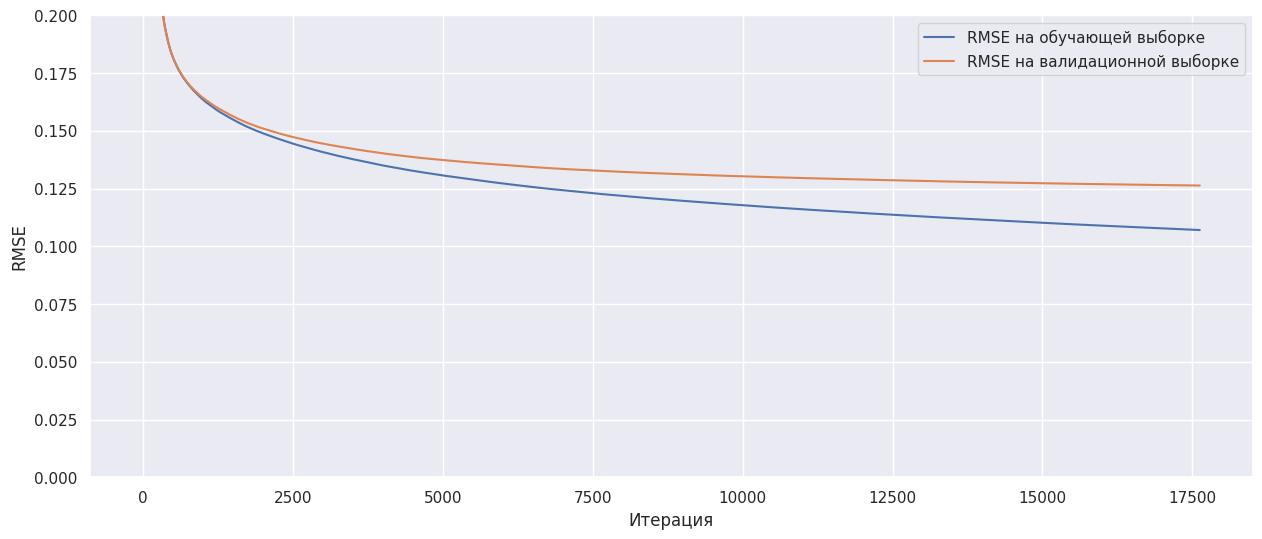

In [24]:
plt.figure(figsize = (15, 6))

plt.plot(rmse['learn']['RMSE'], label = 'RMSE на обучающей выборке')
plt.plot(rmse['validation']['RMSE'], label = 'RMSE на валидационной выборке')
plt.xlabel('Итерация')
plt.ylabel('RMSE')

plt.ylim((0, 0.2))

plt.legend()
plt.show()

Text(0.5, 0, 'CatBoost Feature Importance')

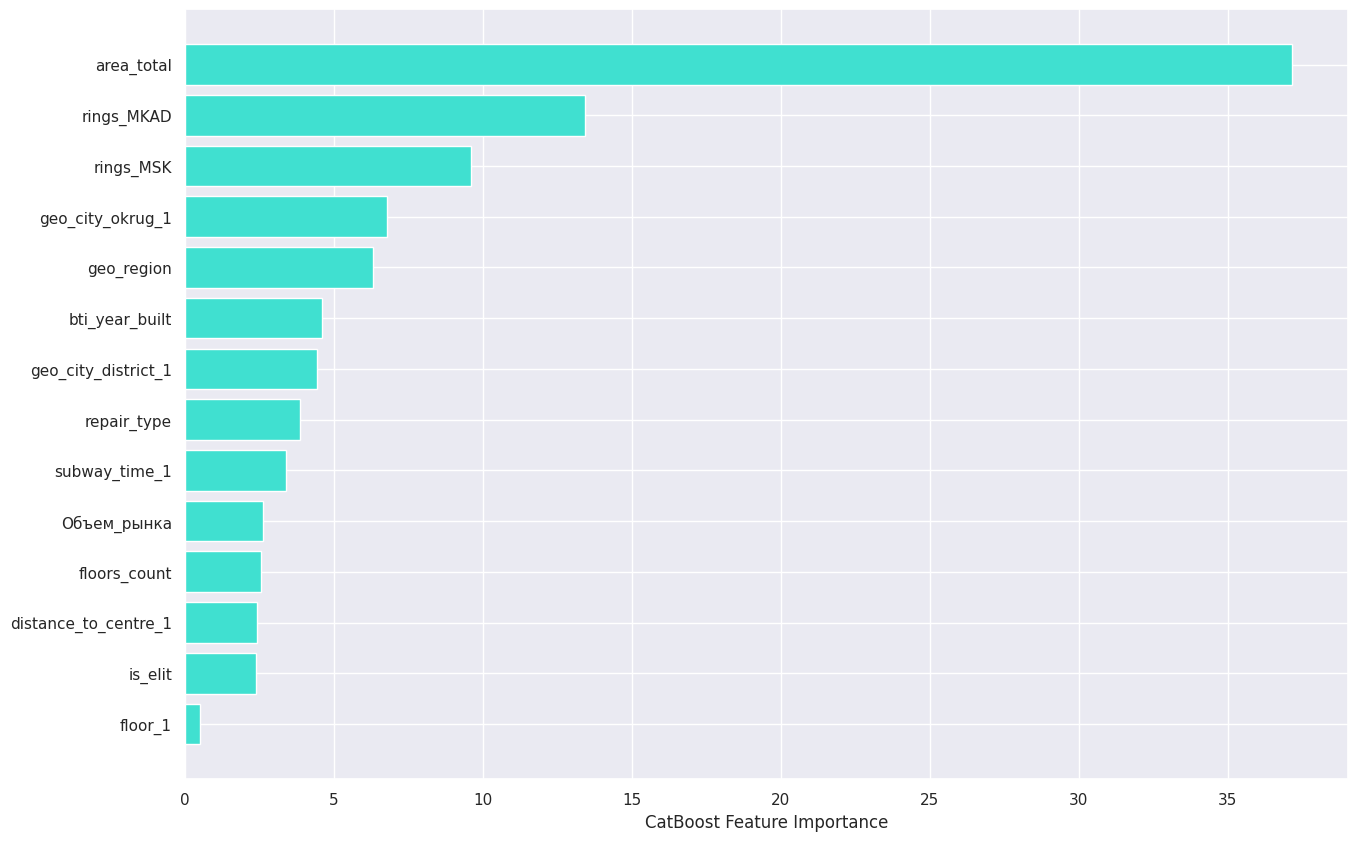

In [25]:
from sklearn.inspection import permutation_importance

feature_names = [
                #'bargainterms_price_LN', 
                'area_total',
                #'floor', 
                'floor_1', 
                'floors_count',
                'is_elit', 
                'geo_region',
                'geo_city_district_1', 
                #'Районы_Kmeans',
                #'Районы_Kmeans_str', 
                'rings_MSK', 
                'geo_city_okrug_1', 
                #'distance_to_nearest_metro',
                'subway_time_1', 
                #'distance_to_centre', 
                'distance_to_centre_1', 
                'rings_MKAD', 
                'repair_type',
                #'is_renovation',
                'bti_year_built',
                'Объем_рынка'
               ]
features = np.array(feature_names)

sorted_feature_importance = catb.feature_importances_.argsort()
plt.figure(figsize = (15, 10))
plt.barh(features[sorted_feature_importance], 
         catb.feature_importances_[sorted_feature_importance], 
         color = 'turquoise')
plt.xlabel("CatBoost Feature Importance")

In [26]:
import pickle
pickle.dump(catb, open('catmodel_mmo_second_with_outliers.pkl', 'wb'))